# TPS Arrest Counts and Arrest Outcomes by Age Group, Sex and Perceived Race

### INF2178 Winter 2023

### Final Submission

### Jupyter Notebook

### Paul King, Zijian Zhang

## Importing the dataset

In [1]:
# import libraries

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
df

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
0             2020    July-Sept  1005907  6017884.0    326622   
1             2020    July-Sept  1014562  6056669.0    326622   
2             2020      Oct-Dec  1029922  6057065.0    326622   
3             2021      Jan-Mar  1052190  6029059.0    327535   
4             2021      Jan-Mar  1015512  6040372.0    327535   
...            ...          ...      ...        ...       ...   
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
0                  White   M      Aged 35 to 44 years   
1                  White   M      Aged 35 to 44 years   
2      Unknown or Legacy   M      Aged 35 to 44 years   
3                  Black   M      Aged 25 to 34 years   
4            South Asian   M      Aged 25 to 34 years   
...                  ...  ..                      ...   
65271         Indigenous   F      Aged 25 to 34 years   
65272        South Asian   M      Aged 35 to 44 years   
65273              White   F      Aged 45 to 54 years   
65274  Unknown or Legacy   M  Aged 17 years and under   
65275             Latino   M      Aged 18 to 24 years   

       Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0                          Not a youth           54  ...   
1                          Not a youth           54  ...   
2                          Not a youth           54  ...   
3                          Not a youth           XX  ...   
4                          Not a youth           XX  ...   
...                                ...          ...  ...   
65271                      Not a youth           XX  ...   
65272                      Not a youth           54  ...   
65273                      Not a youth           XX  ...   
65274  Youth (aged 17 years and under)           XX  ...   
65275                      Not a youth           XX  ...   

       Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   
...                                ...                              ...   
65271                                1                                0   
65272                                0                                0   
65273                                0                                0   
65274                                0                                0   
65275                                0                                0   

      Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                                   0                                1   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
65271                               0                                0   
65272                               0                                0   
65273                               0                                0   
65274                               0                                1   
65275                               0                                1   

       SearchReason_CauseInjur

In [3]:
# Data cleaning
# Information about the dataset indicates that if a stripsearch but no booking is listed, that is an error
# If StripSearch = 1, then Booked should also = 1

df["Booked"] = np.where((df["StripSearch"] == 1) & (df["Booked"] == 0),1,df["Booked"])
df = df.replace(["Aged 65 years and older","Aged 17 years and younger"],["Aged 65 and older","Aged 17 years and under"])



In [4]:
df.describe()

Arrest_Year       EventID      ArrestID       PersonID   StripSearch  \
count  65276.000000  6.527600e+04  6.480700e+04   65276.000000  65276.000000   
mean    2020.510096  1.029998e+06  6.032402e+06  318599.919695      0.119508   
std        0.499902  1.731809e+04  1.870751e+04   10815.387928      0.324388   
min     2020.000000  1.000000e+06  6.000000e+06  300000.000000      0.000000   
25%     2020.000000  1.015001e+06  6.016202e+06  309215.000000      0.000000   
50%     2021.000000  1.030006e+06  6.032402e+06  318595.500000      0.000000   
75%     2021.000000  1.044996e+06  6.048602e+06  327926.250000      0.000000   
max     2021.000000  1.060002e+06  6.064804e+06  337346.000000      1.000000   

             Booked  Actions_at_arrest___Concealed_i  \
count  65276.000000                     65276.000000   
mean       0.528265                         0.004075   
std        0.499204                         0.063706   
min        0.000000                         0.000000   
25%        0.000000                         0.000000   
50%        1.000000                         0.000000   
75%        1.000000                         0.000000   
max        1.000000                         1.000000   

       Actions_at_arrest___Combative__  Actions_at_arrest___Resisted__d  \
count                     65276.000000                     65276.000000   
mean                          0.044136                         0.038330   
std                           0.205398                         0.191992   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Actions_at_arrest___Mental_inst  Actions_at_arrest___Assaulted_o  \
count                     65276.000000                     65276.000000   
mean                          0.033381                         0.006358   
std                           0.179632                         0.079481   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Actions_at_arrest___Cooperative  SearchReason_CauseInjury  \
count                     65276.000000               7801.000000   
mean                          0.445937                  0.765671   
std                           0.497072                  0.423606   
min                           0.000000                  0.000000   
25%                           0.000000                  1.000000   
50%                           0.000000                  1.000000   
75%                           1.000000                  1.000000   
max                           1.000000                  1.000000   

       SearchReason_AssistEscape  SearchReason_PossessWeapons  \
count                7801.000000                  7801.000000   
mean                    0.343161                     0.453403   
std                     0.474795                     0.497856   
min                     0.000000                     0.000000   
25%                     0.000000                     0.000000   
50%                     0.000000                     0.000000   
75%                     1.000000                     1.000000   
max                     1.000000                     1.000000   

       SearchReason_PossessEvidence   ItemsFound      ObjectId  
count                   7801.000000  7801.000000  65276.000000  
mean                       0.418921     0.373157  32638.500000  
std                        0.493414 

In [5]:
# Categorical variables: Perceived_Race, Sex, Youth_at_arrest__under_18_years,
#   ArrestLocDiv, Occurrence_Category, SearchReason_CauseInjury, SearchReason_AssistEscape, SearchReason_PossessWeapons,
#   SearchReason_PossessEvidence, ItemsFound
# Ordinal variables: Arrest_Month, Age_group__at_arrest_
# Binary variables: Arrest_Year (2020 or 2021), StripSearch, Booked, Actions_at_arrest___Concealed_i,
#   Actions_at_arrest___Combative__, Actions_at_arrest___Resisted__d, Actions_at_arrest___Mental_inst,
#   Actions_at_arrest___Assaulted_o, Actions_at_arrest___Cooperative
# Note: we can convert arrest year + arrest month to a single variable for time series


df.dtypes

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [6]:
for variable in df.columns.values:
  print(variable, len(df[variable].unique()))

Arrest_Year 2
Arrest_Month 4
EventID 60003
ArrestID 64806
PersonID 37347
Perceived_Race 9
Sex 3
Age_group__at_arrest_ 8
Youth_at_arrest__under_18_years 3
ArrestLocDiv 18
StripSearch 2
Booked 2
Occurrence_Category 32
Actions_at_arrest___Concealed_i 2
Actions_at_arrest___Combative__ 2
Actions_at_arrest___Resisted__d 2
Actions_at_arrest___Mental_inst 2
Actions_at_arrest___Assaulted_o 2
Actions_at_arrest___Cooperative 2
SearchReason_CauseInjury 3
SearchReason_AssistEscape 3
SearchReason_PossessWeapons 3
SearchReason_PossessEvidence 3
ItemsFound 3
ObjectId 65276


Since there are multiple rows of arrests per person ID, we can calculate probabilities of stripsearching and booking and count the number of arrests.

Explanatory variables - Age / Sex / Perceived Race
Output variables - % probability of stripsearch/booking
stripsearch -> booking

Because Some person IDs have multiple age groups/race, we take the most frequent (mode) of data

In [7]:
# Create list of lists which represent individuals with unique PersonIDs
# We convert this list into a new dataframe for analysis

import statistics
from statistics import mode # arresting officers may input race/age/sex differently, best to take mode

list_of_lists = []
for ID in df["PersonID"].unique():
  subdf = df[df["PersonID"] == ID].reset_index()
  Youth = False
  if mode(subdf["Youth_at_arrest__under_18_years"]) == "Youth (aged 17 years and under)":
    Youth = True
  person_list = [ID, mode(subdf["Perceived_Race"]),mode(subdf["Sex"]),
                 mode(subdf["Age_group__at_arrest_"]),
                 Youth,
                 subdf["StripSearch"].sum()/len(subdf), # Calculate probability of search
                 subdf["Booked"].sum()/len(subdf),len(subdf)] # Calculate probability of arrest
  list_of_lists.append(person_list)
df2 = pd.DataFrame(list_of_lists, 
                   columns = ["PersonID","Perceived_Race","Sex","Age_group","Youth","StripSearch","Booked","Arrests"])
df2=df2.set_index("PersonID")
df2

Perceived_Race Sex                Age_group  Youth  StripSearch  \
PersonID                                                                       
326622                White   M      Aged 35 to 44 years  False     0.000000   
327535          South Asian   M      Aged 25 to 34 years  False     0.000000   
330778                Black   M      Aged 25 to 34 years  False     0.142857   
328630           Indigenous   M      Aged 45 to 54 years  False     0.000000   
312724    Unknown or Legacy   M      Aged 25 to 34 years  False     0.250000   
...                     ...  ..                      ...    ...          ...   
316123           Indigenous   F      Aged 25 to 34 years  False     0.000000   
307736          South Asian   M      Aged 35 to 44 years  False     0.000000   
324057                White   F      Aged 45 to 54 years  False     0.000000   
331870    Unknown or Legacy   M  Aged 17 years and under   True     0.000000   
310583               Latino   M      Aged 18 to 24 years  False     0.000000   

            Booked  Arrests  
PersonID                     
326622    1.000000        3  
327535    0.666667        3  
330778    0.571429        7  
328630    0.000000        1  
312724    0.625000        8  
...            ...      ...  
316123    0.000000        1  
307736    1.000000        1  
324057    0.000000        1  
331870    0.000000        1  
310583    0.000000        1  

[37347 rows x 7 columns]

In [8]:
# Remove rows with unknown/NAN data

df2 = df2.dropna(subset=["Perceived_Race","Age_group"])
df2 = df2.drop(df2[df2.Perceived_Race == 'Unknown or Legacy'].index)
df2 = df2.drop(df2[df2.Sex == 'U'].index)

In [9]:
# Remove rows with arrests more than 3 standard deviations from mean
df2 = df2[df2["Arrests"] < 8]
len(df2)

33178

In [10]:
df2.describe()

StripSearch        Booked       Arrests
count  33178.000000  33178.000000  33178.000000
mean       0.081926      0.476358      1.537826
std        0.244000      0.464559      1.121342
min        0.000000      0.000000      1.000000
25%        0.000000      0.000000      1.000000
50%        0.000000      0.500000      1.000000
75%        0.000000      1.000000      2.000000
max        1.000000      1.000000      7.000000

## Exploratory Data Analysis

In [11]:
px.histogram(df2["Arrests"], title = "Histogram of Arrests", x="Arrests")
# Our data is not normally distributed, which violates an assumption

In [12]:
px.histogram(df2["StripSearch"], title = "Histogram of Stripsearch Probabilities", labels={'value':'Stripsearch %'})

In [13]:
px.histogram(df2["Booked"], title = "Histogram of Booking Probabilities", labels={'value':'Booked %'}) # Not sure why labels are not showing up

### T-tests
We conducted exhaustive  T-tests to determine the T-stat and significance between all combinations of groups for every outcome variable.

In [14]:
# T-test function
from scipy import stats

def welchttest(column,cat1,cat2,outcome,print=False):
  a = df2[df2[column]==cat1]
  b = df2[df2[column]==cat2]
  t_stat, p_value = stats.ttest_ind(a[outcome], b[outcome], equal_var=False)
  significant = "Not statistically significant"
  if p_value < 0.05:
    significant = "Statistically significant"
  if print==True:
    print("Welch's T-Test: Comparing " + outcome + " outcomes depending on " + column)
    print(str(cat1) + " compared to " + str(cat2))
    print("T-statistic: " + str(t_stat))
    print("P-value: " + str(p_value) + ", " + significant)
  return cat1,cat2,t_stat,p_value

In [15]:
ttestlist = [welchttest("Perceived_Race","White","South Asian","StripSearch"),
welchttest("Perceived_Race","White","Black","StripSearch"),
welchttest("Perceived_Race","White","Indigenous","StripSearch"),
welchttest("Perceived_Race","White","Latino","StripSearch"),
welchttest("Perceived_Race","White","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","White","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","South Asian","Black","StripSearch"),
welchttest("Perceived_Race","South Asian","Indigenous","StripSearch"),
welchttest("Perceived_Race","South Asian","Latino","StripSearch"),
welchttest("Perceived_Race","South Asian","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","South Asian","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","Black","Indigenous","StripSearch"),
welchttest("Perceived_Race","Black","Latino","StripSearch"),
welchttest("Perceived_Race","Black","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","Black","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","Indigenous","Latino","StripSearch"),
welchttest("Perceived_Race","Indigenous","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","Indigenous","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","Latino","Middle-Eastern","StripSearch"),
welchttest("Perceived_Race","Latino","East/Southeast Asian","StripSearch"),
welchttest("Perceived_Race","Middle-Eastern","East/Southeast Asian","StripSearch"),
welchttest("Sex","M","F","StripSearch"),
welchttest("Youth",True,False,"StripSearch")]
ttestdf = pd.DataFrame(ttestlist,columns=["Group 1","Group 2","T-stat","P-value"])
ttestdf

Group 1               Group 2     T-stat        P-value
0            White           South Asian   7.727654   1.387389e-14
1            White                 Black  -6.110532   1.012092e-09
2            White            Indigenous  -2.203086   2.793469e-02
3            White                Latino   6.258431   5.161265e-10
4            White        Middle-Eastern   7.673372   2.231767e-14
5            White  East/Southeast Asian   8.544994   1.652046e-17
6      South Asian                 Black -11.470274   4.320539e-30
7      South Asian            Indigenous  -5.160114   3.122395e-07
8      South Asian                Latino   0.505736   6.130927e-01
9      South Asian        Middle-Eastern   0.261951   7.933713e-01
10     South Asian  East/Southeast Asian   0.047025   9.624955e-01
11           Black            Indigenous  -0.234400   8.147429e-01
12           Black                Latino   9.294709   4.447246e-20
13           Black        Middle-Eastern  11.289767   4.003735e-29
14           Black  East/Southeast Asian  12.455462   2.976463e-35
15      Indigenous                Latino   5.139990   3.318468e-07
16      Indigenous        Middle-Eastern   5.251550   1.925468e-07
17      Indigenous  East/Southeast Asian   5.252808   1.952039e-07
18          Latino        Middle-Eastern  -0.281610   7.782685e-01
19          Latino  East/Southeast Asian  -0.487301   6.260985e-01
20  Middle-Eastern  East/Southeast Asian  -0.230919   8.173886e-01
21               M                     F   6.161410   7.446606e-10
22            True                 False -26.503882  1.600988e-124

In [16]:
ttestlist = [welchttest("Perceived_Race","White","South Asian","Booked"),
welchttest("Perceived_Race","White","Black","Booked"),
welchttest("Perceived_Race","White","Indigenous","Booked"),
welchttest("Perceived_Race","White","Latino","Booked"),
welchttest("Perceived_Race","White","Middle-Eastern","Booked"),
welchttest("Perceived_Race","White","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","South Asian","Black","Booked"),
welchttest("Perceived_Race","South Asian","Indigenous","Booked"),
welchttest("Perceived_Race","South Asian","Latino","Booked"),
welchttest("Perceived_Race","South Asian","Middle-Eastern","Booked"),
welchttest("Perceived_Race","South Asian","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","Black","Indigenous","Booked"),
welchttest("Perceived_Race","Black","Latino","Booked"),
welchttest("Perceived_Race","Black","Middle-Eastern","Booked"),
welchttest("Perceived_Race","Black","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","Indigenous","Latino","Booked"),
welchttest("Perceived_Race","Indigenous","Middle-Eastern","Booked"),
welchttest("Perceived_Race","Indigenous","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","Latino","Middle-Eastern","Booked"),
welchttest("Perceived_Race","Latino","East/Southeast Asian","Booked"),
welchttest("Perceived_Race","Middle-Eastern","East/Southeast Asian","Booked"),
welchttest("Sex","M","F","Booked"),
welchttest("Youth",True,False,"Booked")]
ttestdf = pd.DataFrame(ttestlist,columns=["Group 1","Group 2","T-stat","P-value"])
ttestdf

Group 1               Group 2     T-stat       P-value
0            White           South Asian   0.872575  3.829586e-01
1            White                 Black  -8.825244  1.176096e-18
2            White            Indigenous  -2.172552  3.016325e-02
3            White                Latino  -3.246871  1.197285e-03
4            White        Middle-Eastern   1.175167  2.400341e-01
5            White  East/Southeast Asian   4.007577  6.234131e-05
6      South Asian                 Black  -5.844779  5.515114e-09
7      South Asian            Indigenous  -2.402893  1.644595e-02
8      South Asian                Latino  -3.312181  9.410786e-04
9      South Asian        Middle-Eastern   0.281387  7.784269e-01
10     South Asian  East/Southeast Asian   2.203587  2.759701e-02
11           Black            Indigenous   0.782178  4.343745e-01
12           Black                Latino   0.390201  6.964492e-01
13           Black        Middle-Eastern   5.834857  5.975290e-09
14           Black  East/Southeast Asian   9.392310  8.628853e-21
15      Indigenous                Latino  -0.373557  7.087927e-01
16      Indigenous        Middle-Eastern   2.552873  1.082149e-02
17      Indigenous  East/Southeast Asian   3.912881  9.795129e-05
18          Latino        Middle-Eastern   3.454937  5.605978e-04
19          Latino  East/Southeast Asian   5.150506  2.861290e-07
20  Middle-Eastern  East/Southeast Asian   1.809104  7.050342e-02
21               M                     F  21.234465  4.284652e-98
22            True                 False  -9.343647  8.364785e-20

In [17]:
ttestlist = [welchttest("Perceived_Race","White","South Asian","Arrests"),
welchttest("Perceived_Race","White","Black","Arrests"),
welchttest("Perceived_Race","White","Indigenous","Arrests"),
welchttest("Perceived_Race","White","Latino","Arrests"),
welchttest("Perceived_Race","White","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","White","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","South Asian","Black","Arrests"),
welchttest("Perceived_Race","South Asian","Indigenous","Arrests"),
welchttest("Perceived_Race","South Asian","Latino","Arrests"),
welchttest("Perceived_Race","South Asian","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","South Asian","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","Black","Indigenous","Arrests"),
welchttest("Perceived_Race","Black","Latino","Arrests"),
welchttest("Perceived_Race","Black","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","Black","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","Indigenous","Latino","Arrests"),
welchttest("Perceived_Race","Indigenous","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","Indigenous","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","Latino","Middle-Eastern","Arrests"),
welchttest("Perceived_Race","Latino","East/Southeast Asian","Arrests"),
welchttest("Perceived_Race","Middle-Eastern","East/Southeast Asian","Arrests"),
welchttest("Sex","M","F","Arrests"),
welchttest("Youth",True,False,"Arrests")]
ttestdf = pd.DataFrame(ttestlist,columns=["Group 1","Group 2","T-stat","P-value"])
ttestdf

Group 1               Group 2     T-stat       P-value
0            White           South Asian  14.334801  1.327993e-45
1            White                 Black   2.739393  6.160219e-03
2            White            Indigenous  -6.755233  3.199905e-11
3            White                Latino   6.289578  4.270308e-10
4            White        Middle-Eastern   8.558659  1.784198e-17
5            White  East/Southeast Asian  15.637849  4.162438e-54
6      South Asian                 Black -11.859983  5.208061e-32
7      South Asian            Indigenous -10.845527  1.987220e-25
8      South Asian                Latino  -2.424673  1.541893e-02
9      South Asian        Middle-Eastern  -2.815076  4.900317e-03
10     South Asian  East/Southeast Asian   0.183279  8.545863e-01
11           Black            Indigenous  -7.375238  5.025736e-13
12           Black                Latino   4.909786  1.016097e-06
13           Black        Middle-Eastern   6.678100  2.834477e-11
14           Black  East/Southeast Asian  12.914329  1.029126e-37
15      Indigenous                Latino   9.000477  1.364602e-18
16      Indigenous        Middle-Eastern   9.493916  2.866985e-20
17      Indigenous  East/Southeast Asian  10.972106  6.685388e-26
18          Latino        Middle-Eastern   0.164347  8.694732e-01
19          Latino  East/Southeast Asian   2.603952  9.295927e-03
20  Middle-Eastern  East/Southeast Asian   3.075363  2.116978e-03
21               M                     F   8.026609  1.099044e-15
22            True                 False  -4.215321  2.764522e-05

In [18]:
# arrests vs races
fig = px.box(df2, x="Perceived_Race", y="Arrests",title="Arrest Boxplots by Perceived Race")
fig.show()

In [19]:
# arrests vs age
fig = px.box(df2, x="Age_group", y="Arrests",title="Arrest Boxplots by Age Group")
fig.show()

In [20]:
# arrests vs age
fig = px.box(df2, x="Youth", y="Arrests",title="Arrest Boxplots by Youth Status")
fig.show()

In [21]:
# arrests vs sex
fig = px.box(df2, x="Sex", y="Arrests",title="Arrest Boxplots by Sex")
fig.show()

### Power analysis

In [22]:
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

df2

Perceived_Race Sex            Age_group  Youth  StripSearch  \
PersonID                                                               
326622            White   M  Aged 35 to 44 years  False     0.000000   
327535      South Asian   M  Aged 25 to 34 years  False     0.000000   
330778            Black   M  Aged 25 to 34 years  False     0.142857   
328630       Indigenous   M  Aged 45 to 54 years  False     0.000000   
324224            Black   M  Aged 45 to 54 years  False     0.000000   
...                 ...  ..                  ...    ...          ...   
311475            White   F  Aged 25 to 34 years  False     0.000000   
316123       Indigenous   F  Aged 25 to 34 years  False     0.000000   
307736      South Asian   M  Aged 35 to 44 years  False     0.000000   
324057            White   F  Aged 45 to 54 years  False     0.000000   
310583           Latino   M  Aged 18 to 24 years  False     0.000000   

            Booked  Arrests  
PersonID                     
326622    1.000000        3  
327535    0.666667        3  
330778    0.571429        7  
328630    0.000000        1  
324224    1.000000        1  
...            ...      ...  
311475    0.000000        1  
316123    0.000000        1  
307736    1.000000        1  
324057    0.000000        1  
310583    0.000000        1  

[33178 rows x 7 columns]

In [23]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [24]:
df2_M = df2[df2['Sex'] == "M"]["Booked"]
df2_F = df2[df2['Sex'] == "F"]["Booked"]

In [25]:
# Whether counts of arrests differed between sex, we calculated the effect size of the explanatory variable using Cohen's D metric, which was 0.1033
effect_size = Cohens_d(df2_M,df2_F)
print('Effect size (Cohen\'s D):',effect_size)

# After obtaining the effect size, the required sample size was computed using the obtained effect size and establishing the statistical power at 80%
ratio_ =len(df2_M)/len(df2_F)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=0.8, nobs1=None, ratio=ratio_, alpha=0.05)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed')
print('Actual size :', len(df2_M))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed')
print('Actual size :', len(df2_F))

Effect size (Cohen's D): 0.2837503037476533
Sample Size of nobs1: 123.411 needed
Actual size : 26293
Sample Size of nobs2: 471.291 needed
Actual size : 6885


In [26]:
# Power of our test
power = TTestPower()
n_test = power.solve_power(nobs=26293, effect_size = effect_size, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


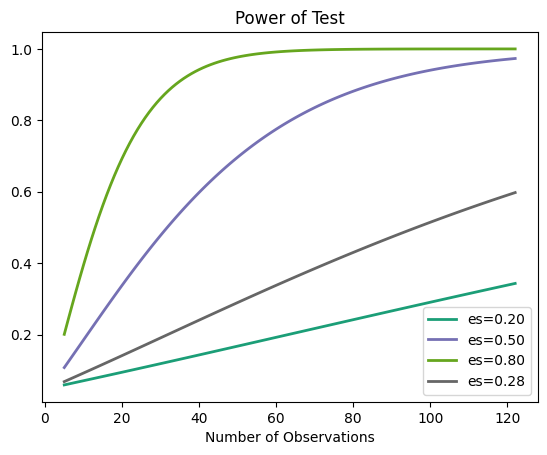

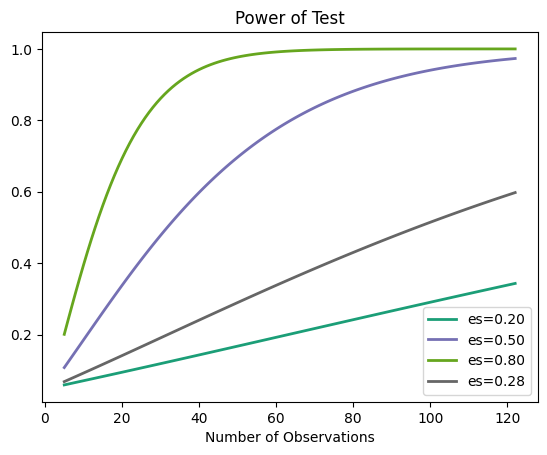

In [27]:
# [ I heared that we need to add this graph, should we change anything? ]

effect_sizes = np.array([0.2, 0.5, 0.8,effect_size])
sample_sizes = np.array(range(5, 123))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
#plt.show()

## ANOVA

In [28]:
# RQ 1

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Arrests ~ C(Perceived_Race)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df         F        PR(>F)
C(Perceived_Race)    540.526545      6.0  72.57297  2.682945e-90
Residual           41176.501486  33171.0       NaN           NaN

In [29]:
# RQ 2

model = ols('StripSearch ~ C(Age_group)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df          F        PR(>F)
C(Age_group)     9.226929      6.0  25.946673  5.782752e-31
Residual      1965.996816  33171.0        NaN           NaN

In [30]:
# RQ 3

model = ols('Booked ~ C(Sex) + C(Perceived_Race) +C(Sex):C(Perceived_Race)', data=df2).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df           F        PR(>F)
C(Sex)                      93.717440      1.0  442.377935  1.428357e-97
C(Perceived_Race)           30.756382      6.0   24.196750  9.380653e-29
C(Sex):C(Perceived_Race)    10.002502      6.0    7.869197  1.719135e-08
Residual                  7025.768983  33164.0         NaN           NaN

## ANCOVA

In [31]:
!pip install pingouin
from pingouin import ancova

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#RQ 2

# [ covar should be numerical, so we can create dummy variable if we needed ]
# Paul note- we can compare rates of stripsearch while controlling for number of arrests
# In line with RQ#2: Is there a difference in stripsearch probabilities between age groups?
# In line with our previous conclusion, there is a difference even when accounting for arrest number
# Do we need EDA for this?
ancova(data=df2, dv='StripSearch', covar='Arrests', between='Age_group')

Source           SS     DF           F          p-unc       np2
0  Age_group     8.227323      6   23.552568   6.093922e-28  0.004242
1    Arrests    34.853566      1  598.657184  4.774499e-131  0.017728
2   Residual  1931.143251  33170         NaN            NaN       NaN

In [33]:
#RQ 3
ancova(data=df2, dv='Booked', covar='Arrests',between='Perceived_Race')

Source           SS     DF           F          p-unc       np2
0  Perceived_Race    26.624689      6   20.939693   1.189408e-24  0.003773
1         Arrests   100.247332      1  473.053024  3.716026e-104  0.014061
2        Residual  7029.241593  33170         NaN            NaN       NaN

In [34]:
#RQ 3
ancova(data=df2, dv='Booked', covar='Arrests',between='Sex')

Source           SS     DF           F          p-unc       np2
0       Sex    85.632415      1  407.569592   4.315696e-90  0.012136
1   Arrests    96.293999      1  458.313664  5.407852e-101  0.013627
2  Residual  6970.233868  33175         NaN            NaN       NaN

## Interaction Plot

In [35]:
df3 = df2
df3.reset_index(inplace = True)
df3

PersonID Perceived_Race Sex            Age_group  Youth  StripSearch  \
0        326622          White   M  Aged 35 to 44 years  False     0.000000   
1        327535    South Asian   M  Aged 25 to 34 years  False     0.000000   
2        330778          Black   M  Aged 25 to 34 years  False     0.142857   
3        328630     Indigenous   M  Aged 45 to 54 years  False     0.000000   
4        324224          Black   M  Aged 45 to 54 years  False     0.000000   
...         ...            ...  ..                  ...    ...          ...   
33173    311475          White   F  Aged 25 to 34 years  False     0.000000   
33174    316123     Indigenous   F  Aged 25 to 34 years  False     0.000000   
33175    307736    South Asian   M  Aged 35 to 44 years  False     0.000000   
33176    324057          White   F  Aged 45 to 54 years  False     0.000000   
33177    310583         Latino   M  Aged 18 to 24 years  False     0.000000   

         Booked  Arrests  
0      1.000000        3  
1      0.666667        3  
2      0.571429        7  
3      0.000000        1  
4      1.000000        1  
...         ...      ...  
33173  0.000000        1  
33174  0.000000        1  
33175  1.000000        1  
33176  0.000000        1  
33177  0.000000        1  

[33178 rows x 8 columns]

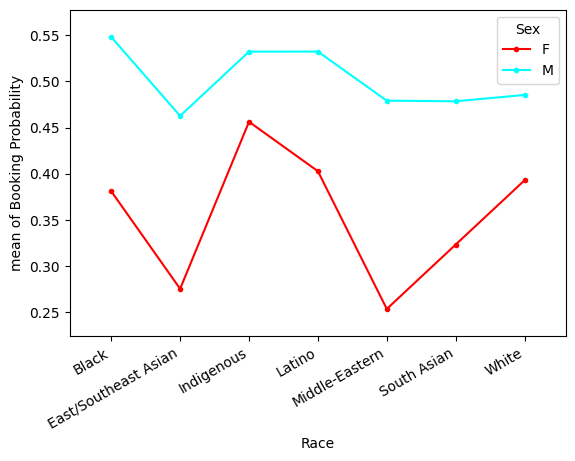

In [36]:
from statsmodels.graphics.factorplots import interaction_plot
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['Booked'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=sex,
    response=outcome,
    xlabel="Race",
    ylabel="Booking Probability"
)
fig.autofmt_xdate()


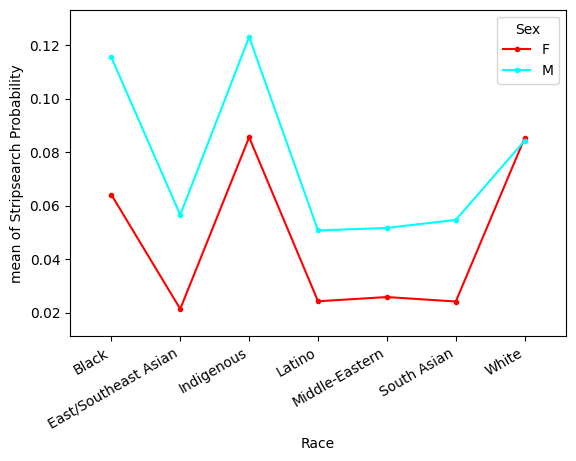

In [37]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['StripSearch'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=sex,
    response=outcome,
    xlabel="Race",
    ylabel="Stripsearch Probability"
)
fig.autofmt_xdate()


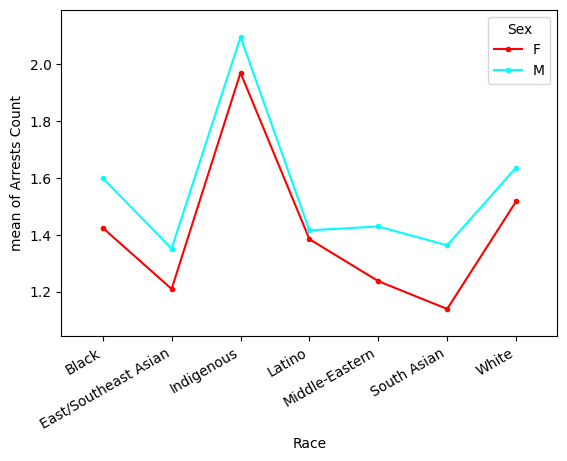

In [38]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['Arrests'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=sex,
    response=outcome,
    xlabel="Race",
    ylabel="Arrests Count"
)
fig.autofmt_xdate()


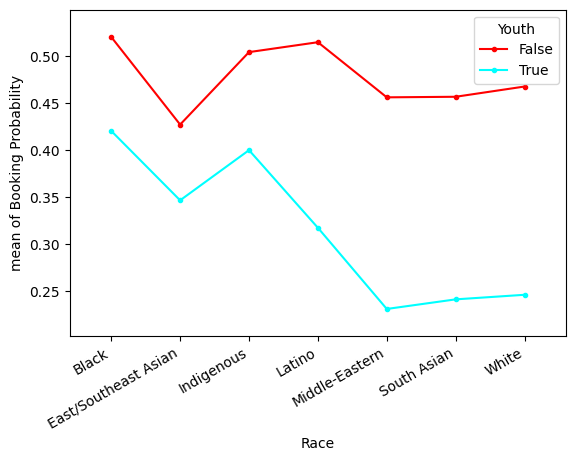

In [39]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['Booked'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=youth,
    response=outcome,
    xlabel="Race",
    ylabel="Booking Probability"
)
fig.autofmt_xdate()


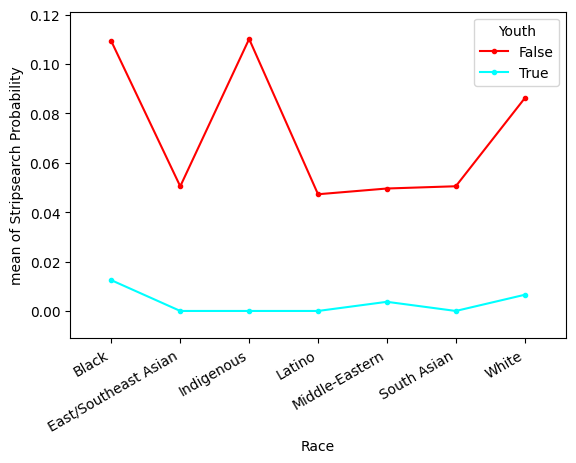

In [40]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['StripSearch'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=youth,
    response=outcome,
    xlabel="Race",
    ylabel="Stripsearch Probability"
)
fig.autofmt_xdate()


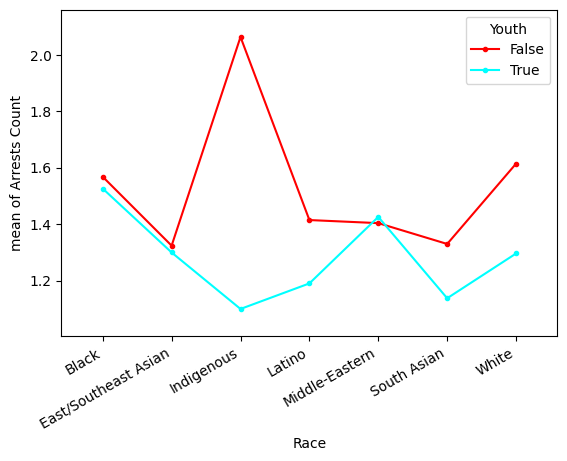

In [41]:
race = df3['Perceived_Race'].astype("category")
youth = df3['Youth'].astype("category")
sex = df3['Sex'].astype("category")
outcome = df3['Arrests'].values
fig = interaction_plot(
    x=df3['Perceived_Race'],
    trace=youth,
    response=outcome,
    xlabel="Race",
    ylabel="Arrests Count"
)
fig.autofmt_xdate()


## Tukey's HSD Test

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey1 = pairwise_tukeyhsd(df3['Arrests'],df3['Perceived_Race'])
print(tukey1)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.2429    0.0 -0.3106 -0.1751   True
               Black           Indigenous   0.4808    0.0  0.3439  0.6177   True
               Black               Latino  -0.1561 0.0002 -0.2605 -0.0516   True
               Black       Middle-Eastern  -0.1621    0.0  -0.242 -0.0822   True
               Black          South Asian  -0.2387    0.0 -0.3131 -0.1644   True
               Black                White   0.0416 0.0685 -0.0016  0.0848  False
East/Southeast Asian           Indigenous   0.7236    0.0  0.5783   0.869   True
East/Southeast Asian               Latino   0.0868 0.2847 -0.0285  0.2021  False
East/Southeast Asian       Middle-Eastern   0.0808 0.1443 -0.0129  0.1744  False
East/Southeast Asian        

In [43]:
tukey1df = pd.DataFrame(data=tukey1._results_table.data[1:], columns=tukey1._results_table.data[0])
tukey1df

group1                group2  meandiff   p-adj   lower  \
0                  Black  East/Southeast Asian   -0.2429  0.0000 -0.3106   
1                  Black            Indigenous    0.4808  0.0000  0.3439   
2                  Black                Latino   -0.1561  0.0002 -0.2605   
3                  Black        Middle-Eastern   -0.1621  0.0000 -0.2420   
4                  Black           South Asian   -0.2387  0.0000 -0.3131   
5                  Black                 White    0.0416  0.0685 -0.0016   
6   East/Southeast Asian            Indigenous    0.7236  0.0000  0.5783   
7   East/Southeast Asian                Latino    0.0868  0.2847 -0.0285   
8   East/Southeast Asian        Middle-Eastern    0.0808  0.1443 -0.0129   
9   East/Southeast Asian           South Asian    0.0041  1.0000 -0.0848   
10  East/Southeast Asian                 White    0.2845  0.0000  0.2193   
11            Indigenous                Latino   -0.6368  0.0000 -0.8025   
12            Indigenous        Middle-Eastern   -0.6429  0.0000 -0.7943   
13            Indigenous           South Asian   -0.7195  0.0000 -0.8680   
14            Indigenous                 White   -0.4392  0.0000 -0.5748   
15                Latino        Middle-Eastern   -0.0060  1.0000 -0.1289   
16                Latino           South Asian   -0.0827  0.3869 -0.2019   
17                Latino                 White    0.1977  0.0000  0.0949   
18        Middle-Eastern           South Asian   -0.0766  0.2471 -0.1752   
19        Middle-Eastern                 White    0.2037  0.0000  0.1259   
20           South Asian                 White    0.2803  0.0000  0.2083   

     upper  reject  
0  -0.1751    True  
1   0.6177    True  
2  -0.0516    True  
3  -0.0822    True  
4  -0.1644    True  
5   0.0848   False  
6   0.8690    True  
7   0.2021   False  
8   0.1744   False  
9   0.0931   False  
10  0.3497    True  
11 -0.4712    True  
12 -0.4915    True  
13 -0.5710    True  
14 -0.3035    True  
15  0.1168   False  
16  0.0366   False  
17  0.3005    True  
18  0.0219   False  
19  0.2815    True  
20  0.3524    True

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey2 = pairwise_tukeyhsd(df3['StripSearch'],df3['Age_group'])
print(tukey2)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
         group1                group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
Aged 17 years and under Aged 18 to 24 years   0.0428    0.0  0.0238  0.0619   True
Aged 17 years and under Aged 25 to 34 years   0.0263 0.0003  0.0082  0.0443   True
Aged 17 years and under Aged 35 to 44 years   0.0208 0.0165  0.0022  0.0393   True
Aged 17 years and under Aged 45 to 54 years   0.0085 0.8592 -0.0111  0.0281  False
Aged 17 years and under Aged 55 to 64 years  -0.0048 0.9947 -0.0264  0.0168  False
Aged 17 years and under   Aged 65 and older  -0.0346 0.0063 -0.0632 -0.0061   True
    Aged 18 to 24 years Aged 25 to 34 years  -0.0165 0.0008 -0.0284 -0.0046   True
    Aged 18 to 24 years Aged 35 to 44 years   -0.022    0.0 -0.0347 -0.0094   True
    Aged 18 to 24 years Aged 45 to 54 years  -0.0343    0.0 -0.0484 -0.0201   True
    

In [45]:
tukey2df = pd.DataFrame(data=tukey2._results_table.data[1:], columns=tukey2._results_table.data[0])
tukey2df

group1               group2  meandiff   p-adj   lower  \
0   Aged 17 years and under  Aged 18 to 24 years    0.0428  0.0000  0.0238   
1   Aged 17 years and under  Aged 25 to 34 years    0.0263  0.0003  0.0082   
2   Aged 17 years and under  Aged 35 to 44 years    0.0208  0.0165  0.0022   
3   Aged 17 years and under  Aged 45 to 54 years    0.0085  0.8592 -0.0111   
4   Aged 17 years and under  Aged 55 to 64 years   -0.0048  0.9947 -0.0264   
5   Aged 17 years and under    Aged 65 and older   -0.0346  0.0063 -0.0632   
6       Aged 18 to 24 years  Aged 25 to 34 years   -0.0165  0.0008 -0.0284   
7       Aged 18 to 24 years  Aged 35 to 44 years   -0.0220  0.0000 -0.0347   
8       Aged 18 to 24 years  Aged 45 to 54 years   -0.0343  0.0000 -0.0484   
9       Aged 18 to 24 years  Aged 55 to 64 years   -0.0476  0.0000 -0.0645   
10      Aged 18 to 24 years    Aged 65 and older   -0.0774  0.0000 -0.1025   
11      Aged 25 to 34 years  Aged 35 to 44 years   -0.0055  0.7651 -0.0165   
12      Aged 25 to 34 years  Aged 45 to 54 years   -0.0177  0.0008 -0.0305   
13      Aged 25 to 34 years  Aged 55 to 64 years   -0.0311  0.0000 -0.0468   
14      Aged 25 to 34 years    Aged 65 and older   -0.0609  0.0000 -0.0852   
15      Aged 35 to 44 years  Aged 45 to 54 years   -0.0122  0.1027 -0.0257   
16      Aged 35 to 44 years  Aged 55 to 64 years   -0.0256  0.0001 -0.0419   
17      Aged 35 to 44 years    Aged 65 and older   -0.0554  0.0000 -0.0801   
18      Aged 45 to 54 years  Aged 55 to 64 years   -0.0134  0.2647 -0.0308   
19      Aged 45 to 54 years    Aged 65 and older   -0.0432  0.0000 -0.0687   
20      Aged 55 to 64 years    Aged 65 and older   -0.0298  0.0203 -0.0569   

     upper  reject  
0   0.0619    True  
1   0.0443    True  
2   0.0393    True  
3   0.0281   False  
4   0.0168   False  
5  -0.0061    True  
6  -0.0046    True  
7  -0.0094    True  
8  -0.0201    True  
9  -0.0308    True  
10 -0.0523    True  
11  0.0056   False  
12 -0.0050    True  
13 -0.0154    True  
14 -0.0366    True  
15  0.0012   False  
16 -0.0093    True  
17 -0.0307    True  
18  0.0041   False  
19 -0.0177    True  
20 -0.0027    True

# Logistic regression

In [46]:
df3 = df

In [47]:
# Remove rows with unknown/NAN data
df3 = df
df3 = df3.dropna(subset=["Perceived_Race","Age_group__at_arrest_","Occurrence_Category"])
df3 = df3.drop(df3[df3.Perceived_Race == 'Unknown or Legacy'].index)
df3 = df3.drop(df3[df3.Sex == 'U'].index)

In [48]:
#df3
# Need to encode race sex and age group
df3["Sex_encoded"] = pd.factorize(df3["Sex"])[0]
df3["Year_encoded"] = pd.factorize(df3["Arrest_Year"])[0]
age_map = {'Aged 35 to 44 years':3, 'Aged 25 to 34 years':2,
       'Aged 45 to 54 years':4, 'Aged 55 to 64 years':5,
       'Aged 18 to 24 years':1, 'Aged 65 and older':6,
       'Aged 17 years and under':0}
df3["Age_encoded"] = df["Age_group__at_arrest_"].replace(age_map)
df3 = pd.get_dummies(df3, columns=["Arrest_Month","Perceived_Race"],prefix=["Mon","Race"])

In [49]:
df3

Arrest_Year  EventID   ArrestID  PersonID Sex Age_group__at_arrest_  \
0             2020  1005907  6017884.0    326622   M   Aged 35 to 44 years   
1             2020  1014562  6056669.0    326622   M   Aged 35 to 44 years   
3             2021  1052190  6029059.0    327535   M   Aged 25 to 34 years   
4             2021  1015512  6040372.0    327535   M   Aged 25 to 34 years   
5             2021  1019145  6060688.0    327535   M   Aged 25 to 34 years   
...            ...      ...        ...       ...  ..                   ...   
65270         2021  1046034  6029720.0    311475   F   Aged 25 to 34 years   
65271         2021  1055609  6044336.0    316123   F   Aged 25 to 34 years   
65272         2021  1032758  6031692.0    307736   M   Aged 35 to 44 years   
65273         2021  1021067  6064396.0    324057   F   Aged 45 to 54 years   
65275         2021  1033395  6032145.0    310583   M   Aged 18 to 24 years   

      Youth_at_arrest__under_18_years ArrestLocDiv  StripSearch  Booked  ...  \
0                         Not a youth           54            0       1  ...   
1                         Not a youth           54            0       1  ...   
3                         Not a youth           XX            0       0  ...   
4                         Not a youth           XX            0       1  ...   
5                         Not a youth           42            0       1  ...   
...                               ...          ...          ...     ...  ...   
65270                     Not a youth           XX            0       0  ...   
65271                     Not a youth           XX            0       0  ...   
65272                     Not a youth           54            0       1  ...   
65273                     Not a youth           XX            0       0  ...   
65275                     Not a youth           XX            0       0  ...   

      Mon_Jan-Mar  Mon_July-Sept  Mon_Oct-Dec  Race_Black  \
0               0              1            0           0   
1               0              1            0           0   
3               1              0            0           1   
4               1              0            0           0   
5               0              0            0           0   
...           ...            ...          ...         ...   
65270           0              0            1           0   
65271           0              0            1           0   
65272           0              0            1           0   
65273           0              0            1           0   
65275           0              0            1           0   

       Race_East/Southeast Asian  Race_Indigenous  Race_Latino  \
0                              0                0            0   
1                              0                0            0   
3                              0                0            0   
4                              0                0            0   
5                              0                0            0   
...                          ...              ...          ...   
65270                          0                0            0   
65271                          0                1            0   
65272                          0                0            0   
65273                          0                0            0   
65275                          0                0            1   

       Race_Middle-Eastern  Race_South Asian  Race_White  
0                        0                 0           1  
1                        0                 0           1  
3                        0                 0           0  
4                        0                 1           0  
5                        0                 1           0  
...                    ...               ...         ...  
65270                    0                 0           1  
65271                    0                 0           0  
65272                    0                 1        

In [50]:
df3 = df3.rename(columns={'Race_East/Southeast Asian':'Race_East_Southeast_Asian','Race_Middle-Eastern':'Race_Middle_Eastern',
 'Race_South Asian':'Race_South_Asian'})
df3.columns = [c.replace('-', '_') for c in df3.columns]

In [51]:
list(df3)

['Arrest_Year',
 'EventID',
 'ArrestID',
 'PersonID',
 'Sex',
 'Age_group__at_arrest_',
 'Youth_at_arrest__under_18_years',
 'ArrestLocDiv',
 'StripSearch',
 'Booked',
 'Occurrence_Category',
 'Actions_at_arrest___Concealed_i',
 'Actions_at_arrest___Combative__',
 'Actions_at_arrest___Resisted__d',
 'Actions_at_arrest___Mental_inst',
 'Actions_at_arrest___Assaulted_o',
 'Actions_at_arrest___Cooperative',
 'SearchReason_CauseInjury',
 'SearchReason_AssistEscape',
 'SearchReason_PossessWeapons',
 'SearchReason_PossessEvidence',
 'ItemsFound',
 'ObjectId',
 'Sex_encoded',
 'Year_encoded',
 'Age_encoded',
 'Mon_Apr_June',
 'Mon_Jan_Mar',
 'Mon_July_Sept',
 'Mon_Oct_Dec',
 'Race_Black',
 'Race_East_Southeast_Asian',
 'Race_Indigenous',
 'Race_Latino',
 'Race_Middle_Eastern',
 'Race_South_Asian',
 'Race_White']

In [52]:
AllPredictors = [ 'Actions_at_arrest___Concealed_i',
 'Actions_at_arrest___Combative__',
 'Actions_at_arrest___Resisted__d',
 'Actions_at_arrest___Mental_inst',
 'Actions_at_arrest___Assaulted_o',
 'Actions_at_arrest___Cooperative',
 'Sex_encoded',
 'Year_encoded',
 'Age_encoded',
 'Mon_Apr_June',
 'Mon_Jan_Mar',
 'Mon_July_Sept',
 'Mon_Oct_Dec', 
 'Race_Black',
 'Race_East_Southeast_Asian',
 'Race_Indigenous',
 'Race_Latino',
 'Race_Middle_Eastern',
 'Race_South_Asian',
 'Race_White',
 'StripSearch',
 'Booked'
 ]

In [53]:
df4 = df3[AllPredictors]

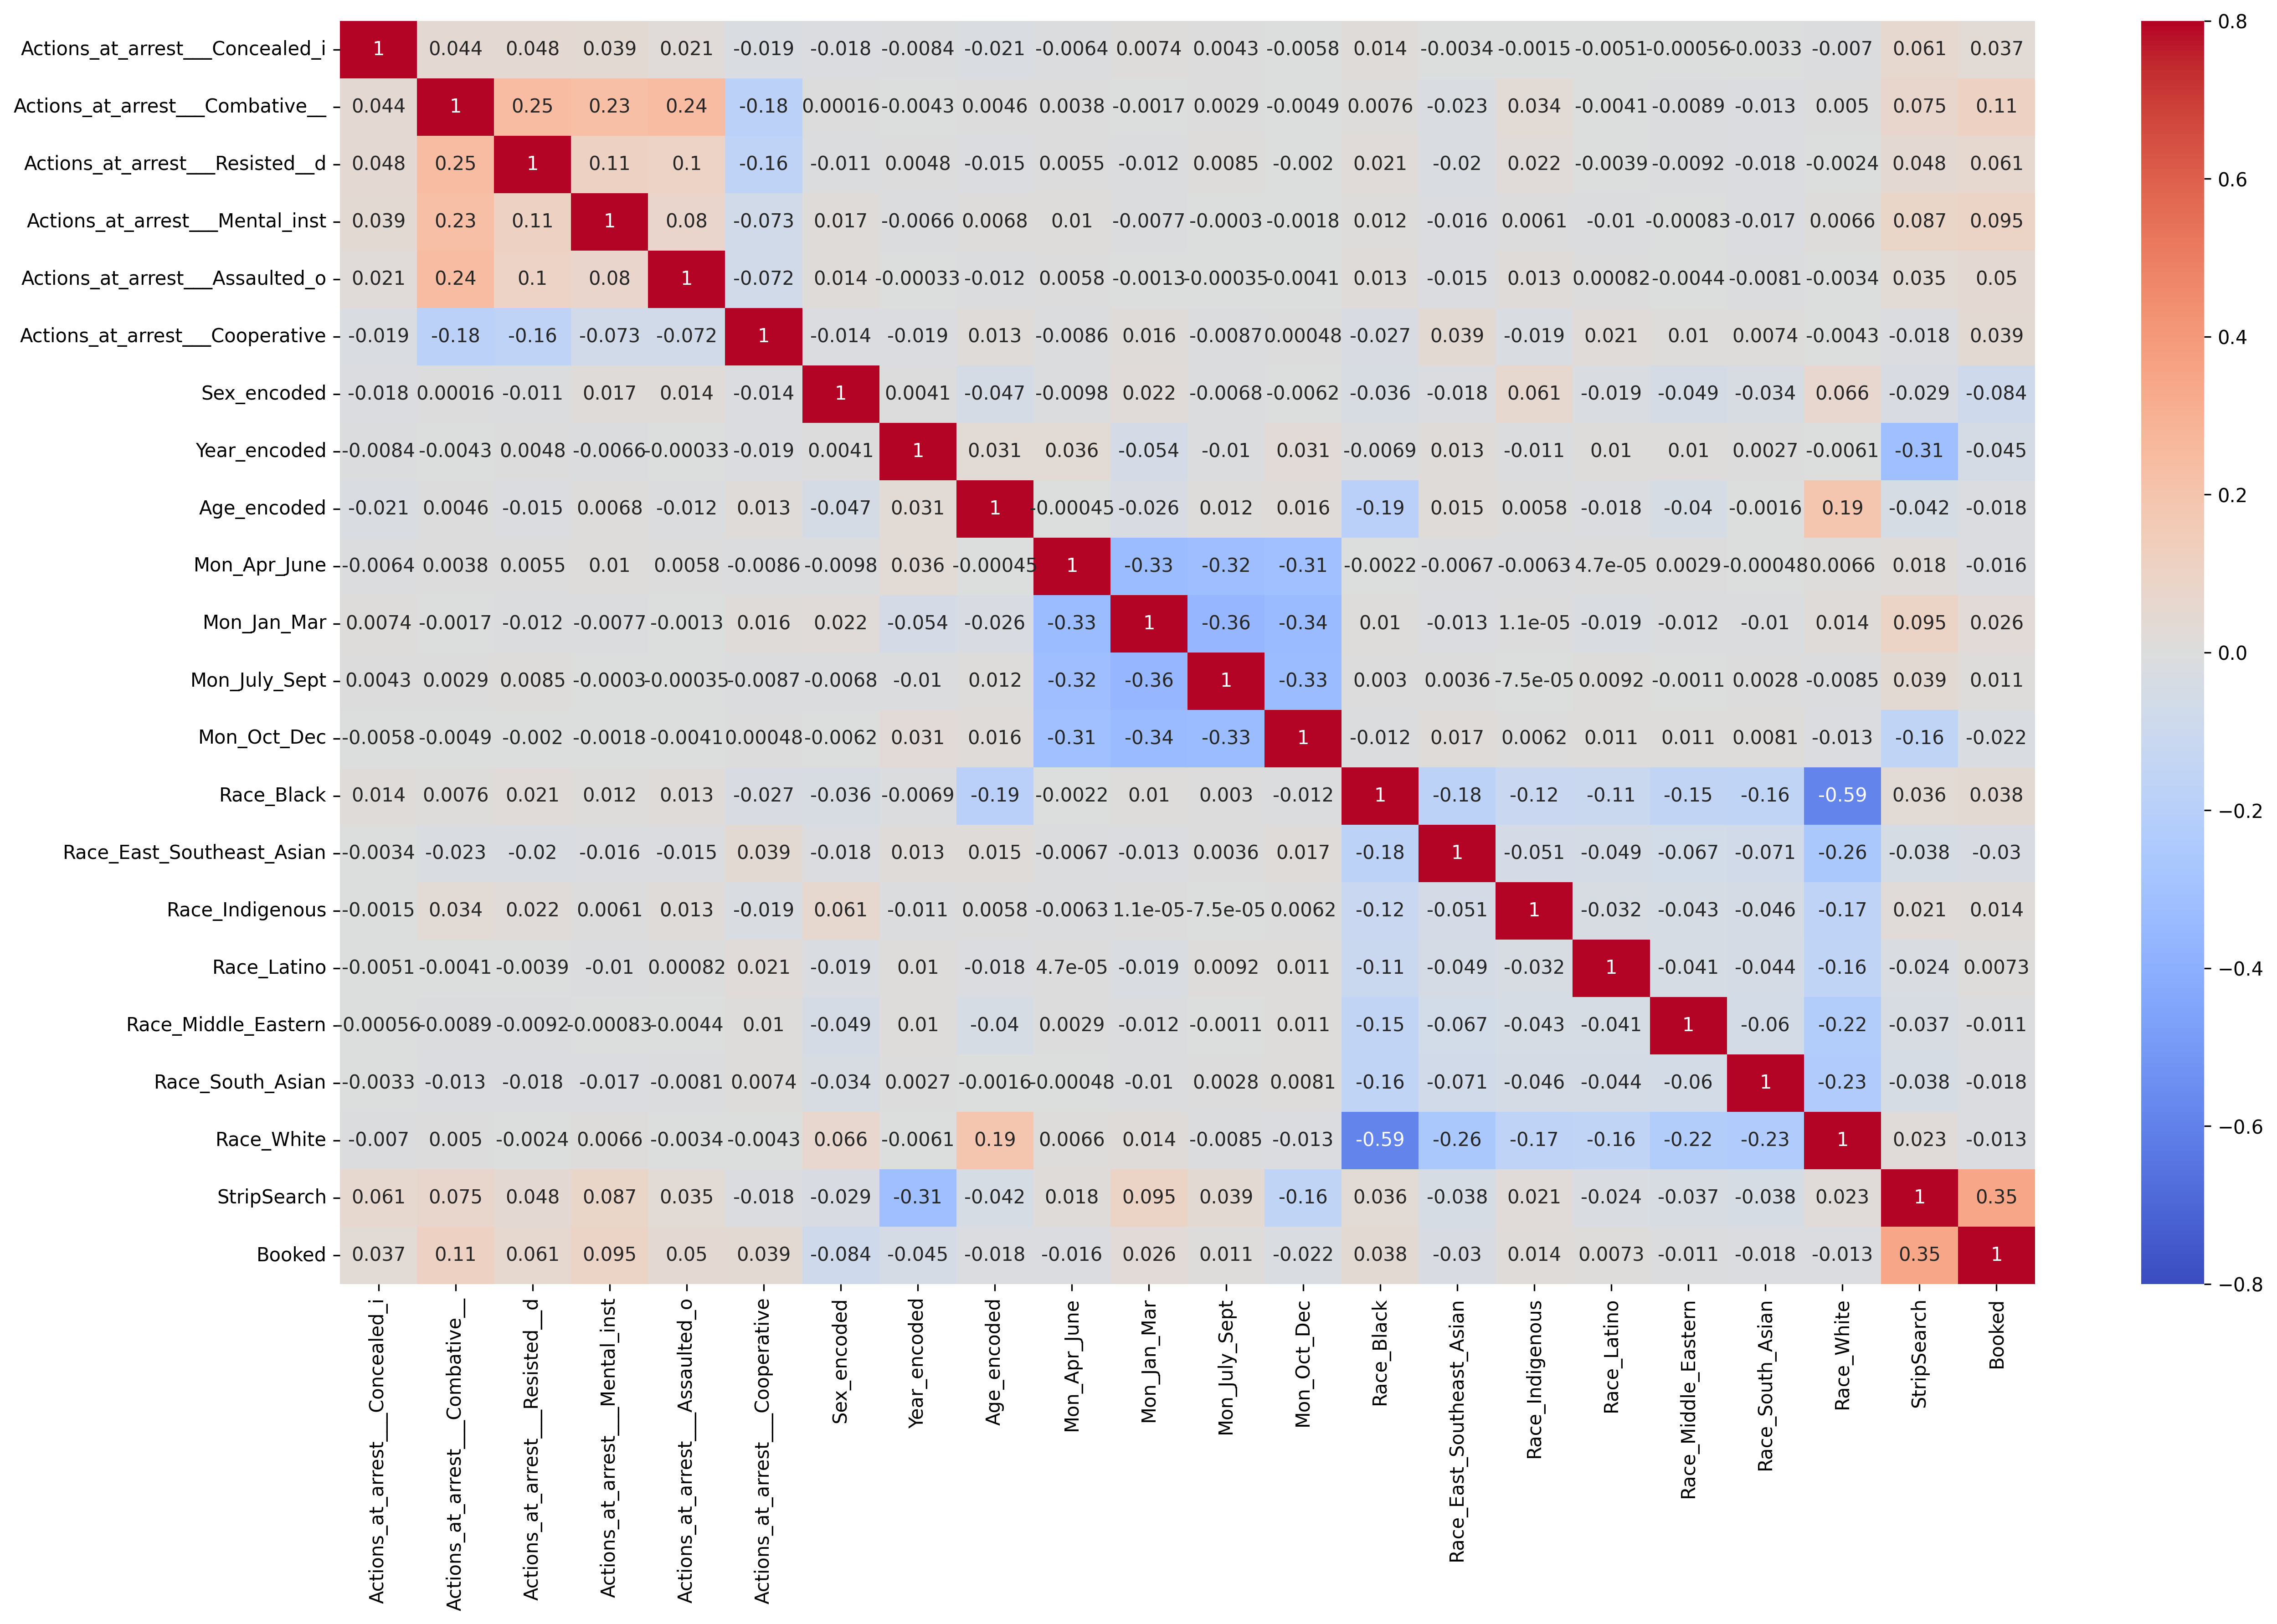

In [54]:
import seaborn as sns
corr = df4.corr()
fig, ax = plt.subplots(figsize=(20,12), dpi=300)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-.8, vmax=.8)
plt.show()

In [55]:
AllPredictors = [ 'Actions_at_arrest___Concealed_i',
 'Actions_at_arrest___Combative__',
 'Actions_at_arrest___Resisted__d',
 'Actions_at_arrest___Mental_inst',
 'Actions_at_arrest___Assaulted_o',
 'Actions_at_arrest___Cooperative',
 'Sex_encoded',
 'Year_encoded',
 'Age_encoded',
 'Mon_Apr_June',
 'Mon_Jan_Mar',
 'Mon_July_Sept',
# 'Mon_Oct_Dec', drop one category
 'Race_Black',
# 'Race_East_Southeast_Asian', drop one category
 'Race_Indigenous',
 'Race_Latino',
 'Race_Middle_Eastern',
 'Race_South_Asian',
 'Race_White'
 ]

In [56]:
from sklearn.model_selection import train_test_split
x = df3.loc[:,AllPredictors]
y = df3.loc[:,"StripSearch"]

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [57]:
import statsmodels.formula.api as smf
all_columns = ' + '.join(AllPredictors)
formula = "StripSearch ~ " + all_columns
print("Formula: ", formula, "\n")
trainingdata = pd.concat([x_train,y_train], axis = 1)
log_reg_1 = smf.logit(formula, data=trainingdata).fit()
log_reg_1.summary()

Formula:  StripSearch ~ Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__ + Actions_at_arrest___Resisted__d + Actions_at_arrest___Mental_inst + Actions_at_arrest___Assaulted_o + Actions_at_arrest___Cooperative + Sex_encoded + Year_encoded + Age_encoded + Mon_Apr_June + Mon_Jan_Mar + Mon_July_Sept + Race_Black + Race_Indigenous + Race_Latino + Race_Middle_Eastern + Race_South_Asian + Race_White 

Optimization terminated successfully.
         Current function value: 0.289181
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                45024
Model:                          Logit   Df Residuals:                    45005
Method:                           MLE   Df Model:                           18
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2164
Time:                        03:16:52   Log-Likelihood:                -13020.
converged:                       True   LL-Null:                       -16616.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -3.0453      0.096    -31.614      0.000      -3.234      -2.856
Actions_at_arrest___Concealed_i     1.7058      0.181      9.446      0.000       1.352       2.060
Actions_at_arrest___Combative__     0.5363      0.072      7.483      0.000       0.396       0.677
Actions_at_arrest___Resisted__d     0.3720      0.075      4.983      0.000       0.226       0.518
Actions_at_arrest___Mental_inst     1.0044      0.073     13.853      0.000       0.862       1.147
Actions_at_arrest___Assaulted_o     0.3776      0.172      2.191      0.028       0.040       0.715
Actions_at_arrest___Cooperative    -0.0172      0.033     -0.522      0.602      -0.082       0.047
Sex_encoded                        -0.3324      0.042     -7.906      0.000      -0.415      -0.250
Year_encoded                       -2.6166      0.049    -53.413      0.000      -2.713      -2.521
Age_encoded                        -0.0951      0.012     -7.673      0.000      -0.119      -0.071
Mon_Apr_June                        1.6572      0.065     25.531      0.000       1.530       1.784
Mon_Jan_Mar                         1.8774      0.063     29.954      0.000       1.755       2.000
Mon_July_Sept                       1.7115      0.064     26.880      0.000       1.587       1.836
Race_Black                          0.6184      0.076      8.159      0.000       0.470       0.767
Race_Indigenous                     0.8140      0.106      7.704      0.000       0.607       1.021
Race_Latino                         0.0749      0.128      0.585      0.559      -0.176       0.326
Race_Middle_Eastern                -0.1843      0.111     -1.657      0.097      -0.402       0.034
Race_South_Asian                   -0.0582      0.105     -0.555      0.579      -0.264       0.147
Race_White                          0.6120      0.074      8.261      0.000       0.467       0.757
===================================================================================================
"""

In [58]:
# Odds ratio and confidence intervals
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg_1.params,
        "Lower CI": log_reg_1.conf_int()[0],
        "Upper CI": log_reg_1.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

odds_ratios

OR  Lower CI  Upper CI
Intercept                        0.047583  0.039397  0.057471
Actions_at_arrest___Concealed_i  5.505540  3.864525  7.843389
Actions_at_arrest___Combative__  1.709679  1.485634  1.967513
Actions_at_arrest___Resisted__d  1.450652  1.253187  1.679232
Actions_at_arrest___Mental_inst  2.730384  2.368663  3.147344
Actions_at_arrest___Assaulted_o  1.458757  1.040677  2.044796
Actions_at_arrest___Cooperative  0.982918  0.921313  1.048642
Sex_encoded                      0.717197  0.660463  0.778805
Year_encoded                     0.073050  0.066362  0.080412
Age_encoded                      0.909325  0.887512  0.931675
Mon_Apr_June                     5.244613  4.618089  5.956135
Mon_Jan_Mar                      6.536281  5.780725  7.390591
Mon_July_Sept                    5.537202  4.887572  6.273177
Race_Black                       1.856011  1.599776  2.153286
Race_Indigenous                  2.256936  1.834749  2.776271
Race_Latino                      1.077764  0.838599  1.385139
Race_Middle_Eastern              0.831684  0.668811  1.034220
Race_South_Asian                 0.943429  0.768113  1.158760
Race_White                       1.844097  1.594879  2.132259

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
# Predict responses 
pred_1 = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
     
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))
print('\nArea under curve = ', roc_auc_score(y_test, prediction_1))


Test accuracy =  0.8845359450996069

Area under curve =  0.5339576652203855



Confusion Matrix : 
 [[13146    50]
 [ 1683   130]]


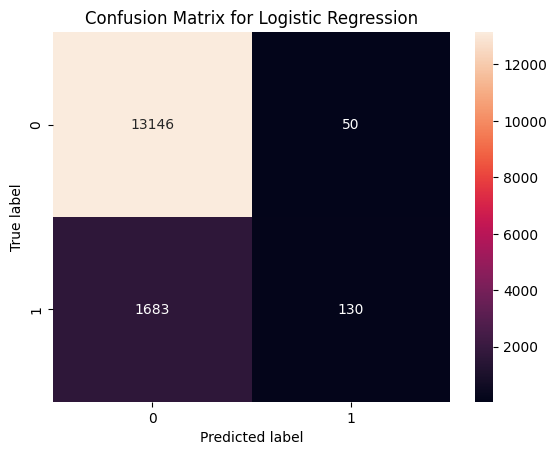

In [60]:
# Confusion matrix

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [61]:
print(len(df3))
print(sum(df3['StripSearch']))
len(df3)/sum(df3['StripSearch'])
# Dataset is imbalanced and Statsmodels logit function does not support weights apparently. Will need an alternative

60033
7264


8.264454845814978

In [62]:
# Implement undersampling
from sklearn.model_selection import train_test_split
x = df3.loc[:,AllPredictors]
y = df3.loc[:,"StripSearch"]

# Under-sampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x, y = rus.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

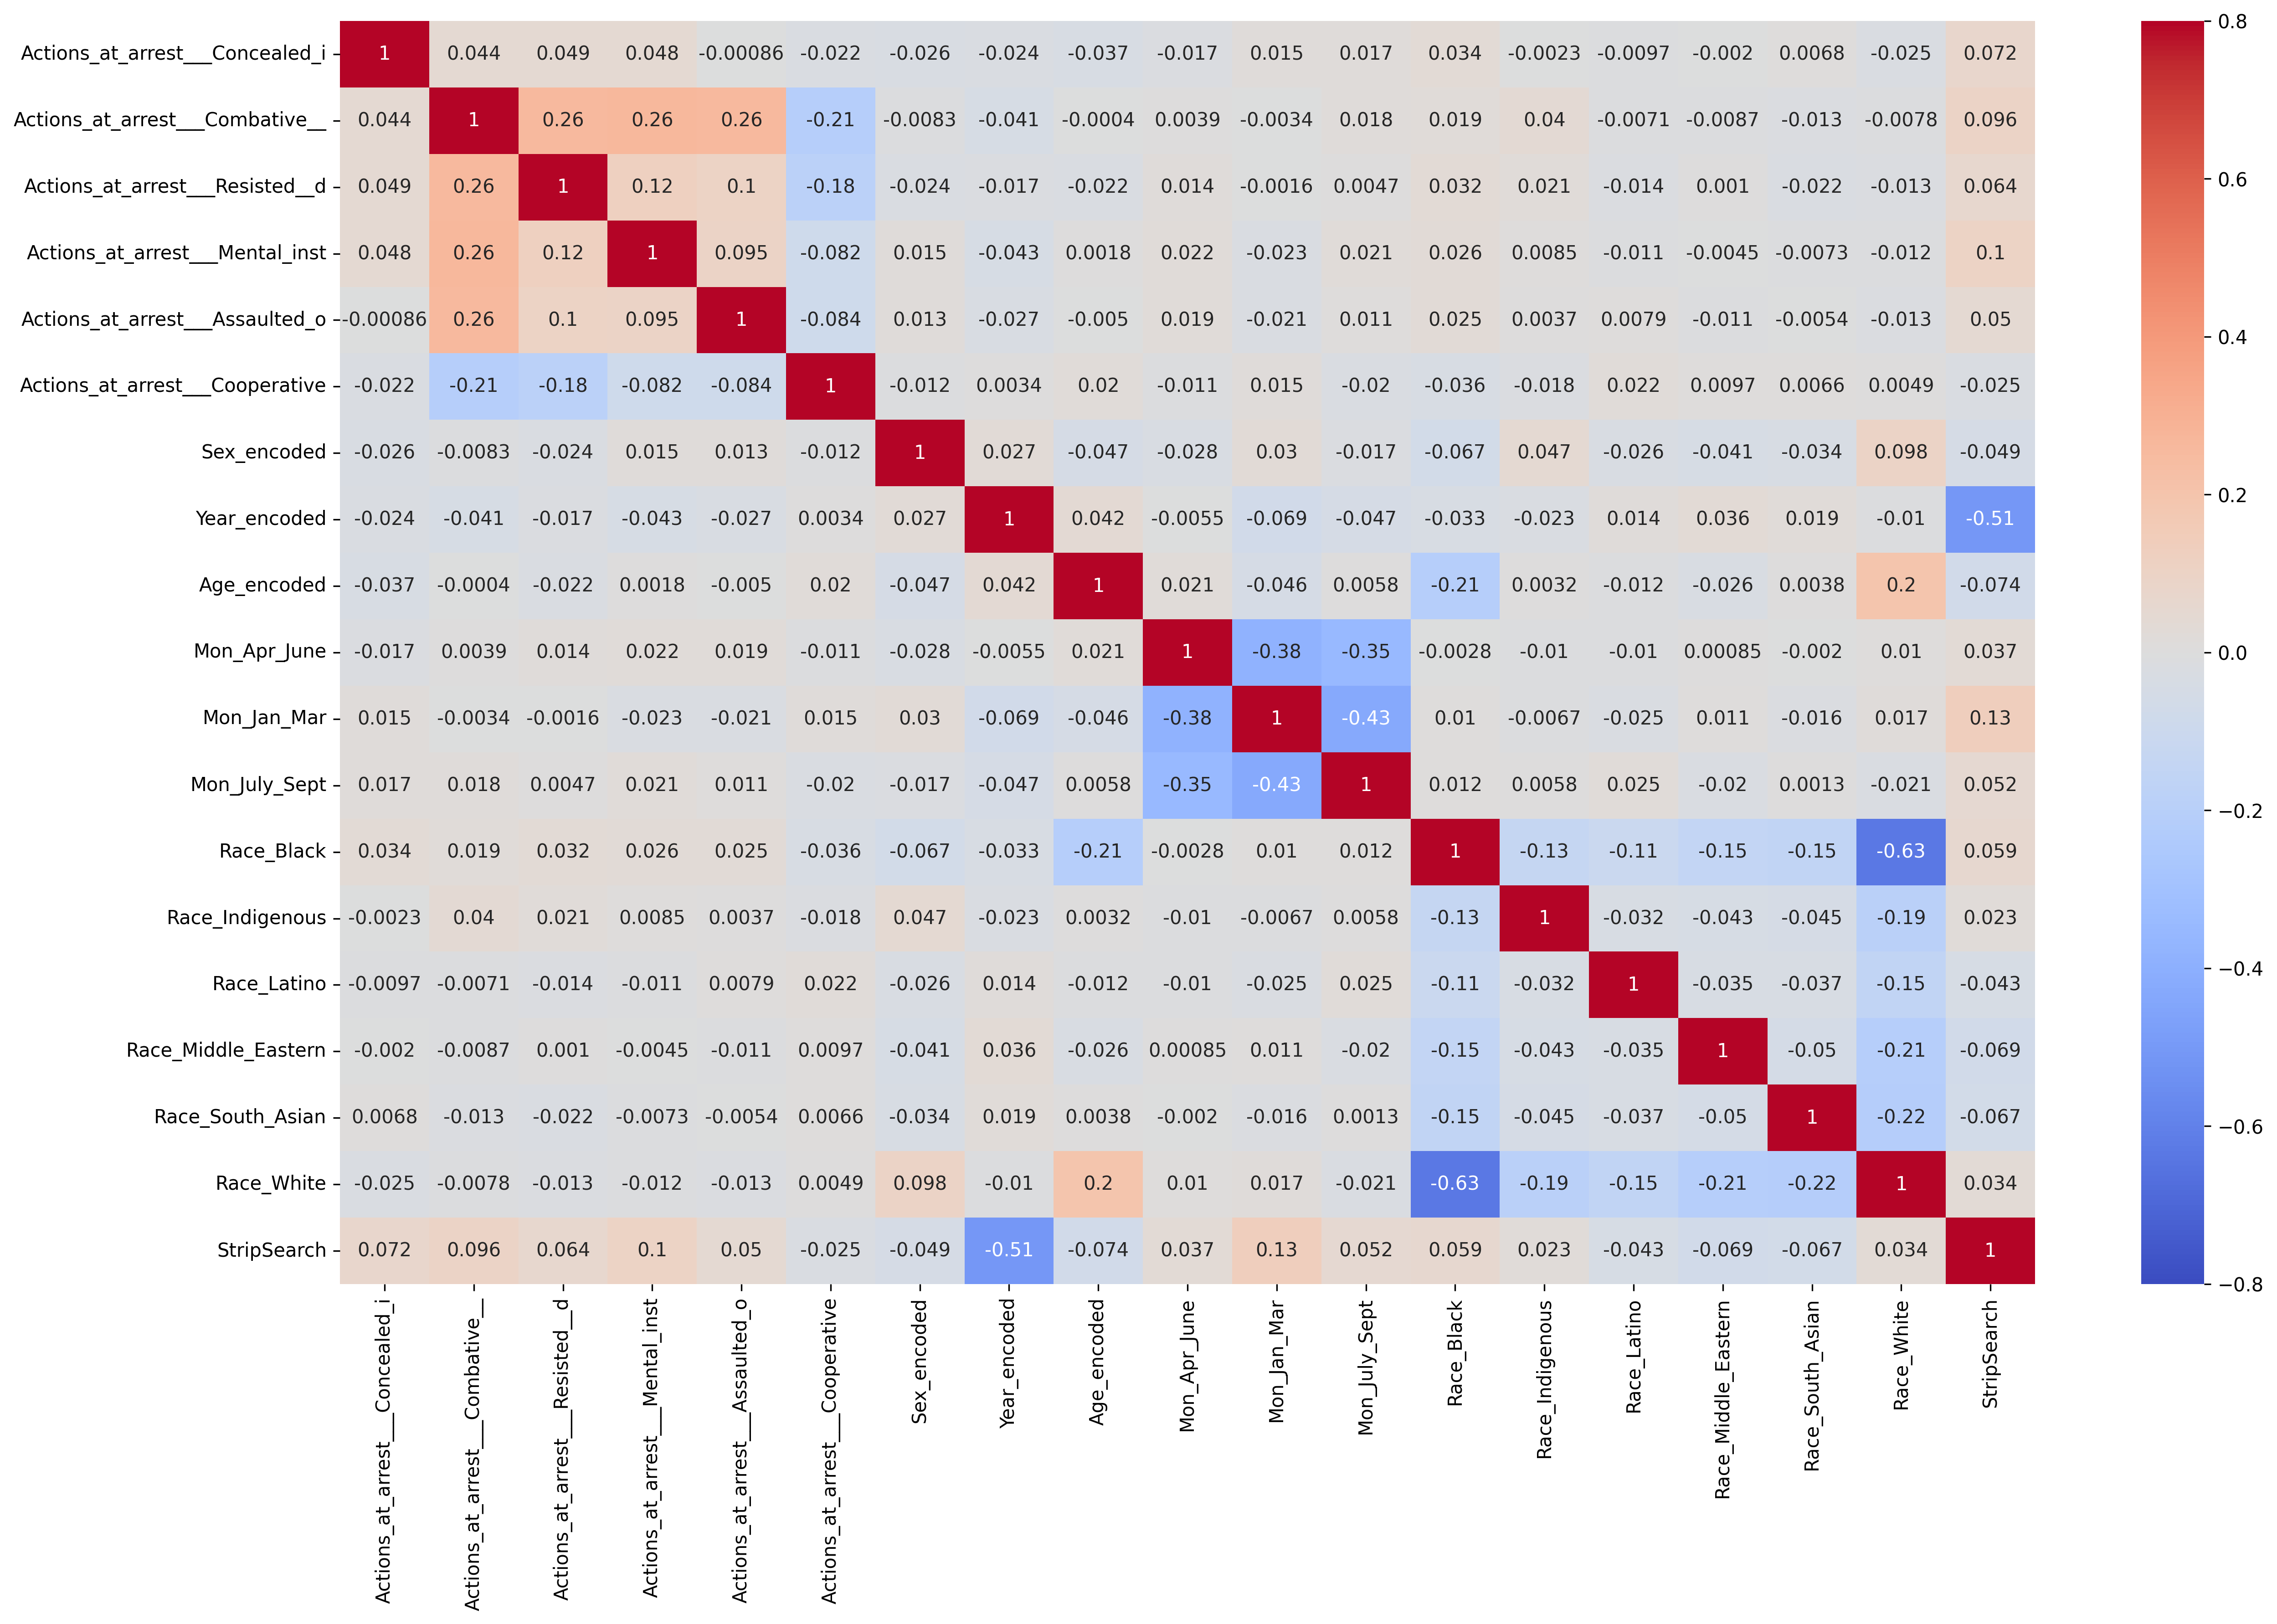

In [63]:
import seaborn as sns
df4 = pd.concat([x,y],axis=1)
corr = df4.corr()
fig, ax = plt.subplots(figsize=(20,12), dpi=300)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-.8, vmax=.8)
plt.show()

In [64]:
import statsmodels.formula.api as smf
all_columns = ' + '.join(AllPredictors)
formula = "StripSearch ~ " + all_columns
print("Formula: ", formula, "\n")
trainingdata = pd.concat([x_train,y_train], axis = 1)
log_reg_2 = smf.logit(formula, data=trainingdata).fit()
log_reg_2.summary()

Formula:  StripSearch ~ Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__ + Actions_at_arrest___Resisted__d + Actions_at_arrest___Mental_inst + Actions_at_arrest___Assaulted_o + Actions_at_arrest___Cooperative + Sex_encoded + Year_encoded + Age_encoded + Mon_Apr_June + Mon_Jan_Mar + Mon_July_Sept + Race_Black + Race_Indigenous + Race_Latino + Race_Middle_Eastern + Race_South_Asian + Race_White 

Optimization terminated successfully.
         Current function value: 0.502743
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                10896
Model:                          Logit   Df Residuals:                    10877
Method:                           MLE   Df Model:                           18
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2747
Time:                        03:17:00   Log-Likelihood:                -5477.9
converged:                       True   LL-Null:                       -7552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.7428      0.129     -5.761      0.000      -0.995      -0.490
Actions_at_arrest___Concealed_i     2.6903      0.462      5.826      0.000       1.785       3.595
Actions_at_arrest___Combative__     0.6198      0.117      5.306      0.000       0.391       0.849
Actions_at_arrest___Resisted__d     0.3861      0.119      3.243      0.001       0.153       0.619
Actions_at_arrest___Mental_inst     0.8744      0.120      7.298      0.000       0.640       1.109
Actions_at_arrest___Assaulted_o     0.5775      0.285      2.027      0.043       0.019       1.136
Actions_at_arrest___Cooperative     0.0476      0.049      0.973      0.330      -0.048       0.143
Sex_encoded                        -0.3192      0.062     -5.190      0.000      -0.440      -0.199
Year_encoded                       -2.6355      0.058    -45.145      0.000      -2.750      -2.521
Age_encoded                        -0.1188      0.019     -6.197      0.000      -0.156      -0.081
Mon_Apr_June                        1.5974      0.082     19.414      0.000       1.436       1.759
Mon_Jan_Mar                         1.7818      0.079     22.606      0.000       1.627       1.936
Mon_July_Sept                       1.5185      0.079     19.104      0.000       1.363       1.674
Race_Black                          0.3455      0.105      3.284      0.001       0.139       0.552
Race_Indigenous                     0.5905      0.158      3.749      0.000       0.282       0.899
Race_Latino                        -0.3300      0.174     -1.893      0.058      -0.672       0.012
Race_Middle_Eastern                -0.4097      0.147     -2.782      0.005      -0.698      -0.121
Race_South_Asian                   -0.3804      0.144     -2.647      0.008      -0.662      -0.099
Race_White                          0.4290      0.102      4.202      0.000       0.229       0.629
===================================================================================================
"""

In [65]:
# Odds ratio and confidence intervals
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg_2.params,
        "Lower CI": log_reg_2.conf_int()[0],
        "Upper CI": log_reg_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

odds_ratios

OR  Lower CI   Upper CI
Intercept                         0.475791  0.369553   0.612570
Actions_at_arrest___Concealed_i  14.736319  5.961379  36.427666
Actions_at_arrest___Combative__   1.858539  1.478214   2.336716
Actions_at_arrest___Resisted__d   1.471298  1.165086   1.857989
Actions_at_arrest___Mental_inst   2.397410  1.895664   3.031957
Actions_at_arrest___Assaulted_o   1.781569  1.019421   3.113521
Actions_at_arrest___Cooperative   1.048767  0.952883   1.154300
Sex_encoded                       0.726719  0.644188   0.819825
Year_encoded                      0.071680  0.063931   0.080370
Age_encoded                       0.887956  0.855201   0.921965
Mon_Apr_June                      4.940194  4.204425   5.804723
Mon_Jan_Mar                       5.940395  5.090073   6.932768
Mon_July_Sept                     4.565471  3.906846   5.335129
Race_Black                        1.412730  1.149487   1.736258
Race_Indigenous                   1.804848  1.325487   2.457569
Race_Latino                       0.718906  0.510864   1.011670
Race_Middle_Eastern               0.663853  0.497396   0.886016
Race_South_Asian                  0.683577  0.515777   0.905970
Race_White                        1.535758  1.257207   1.876025

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
# Predict responses 
pred_1 = log_reg_2.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
     
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))
print('\nArea under curve = ', roc_auc_score(y_test, prediction_1))


Test accuracy =  0.7819383259911894

Area under curve =  0.7798338153182617



Confusion Matrix : 
 [[1222  552]
 [ 240 1618]]


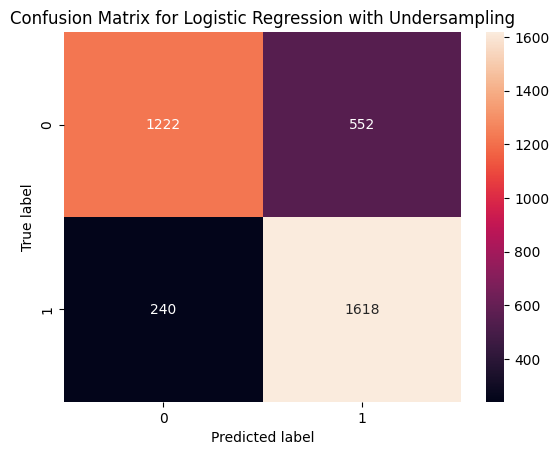

In [67]:
# Confusion matrix

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression with Undersampling')
plt.show()

In [68]:
log_reg_2.params.values

array([-0.74277713,  2.69031515,  0.6197905 ,  0.38614488,  0.87438885,
        0.57749457,  0.0476154 , -0.31921475, -2.63553714, -0.11883317,
        1.59740465,  1.7817756 ,  1.51852179,  0.34552409,  0.59047646,
       -0.33002465, -0.40969414, -0.38041535,  0.42902375])

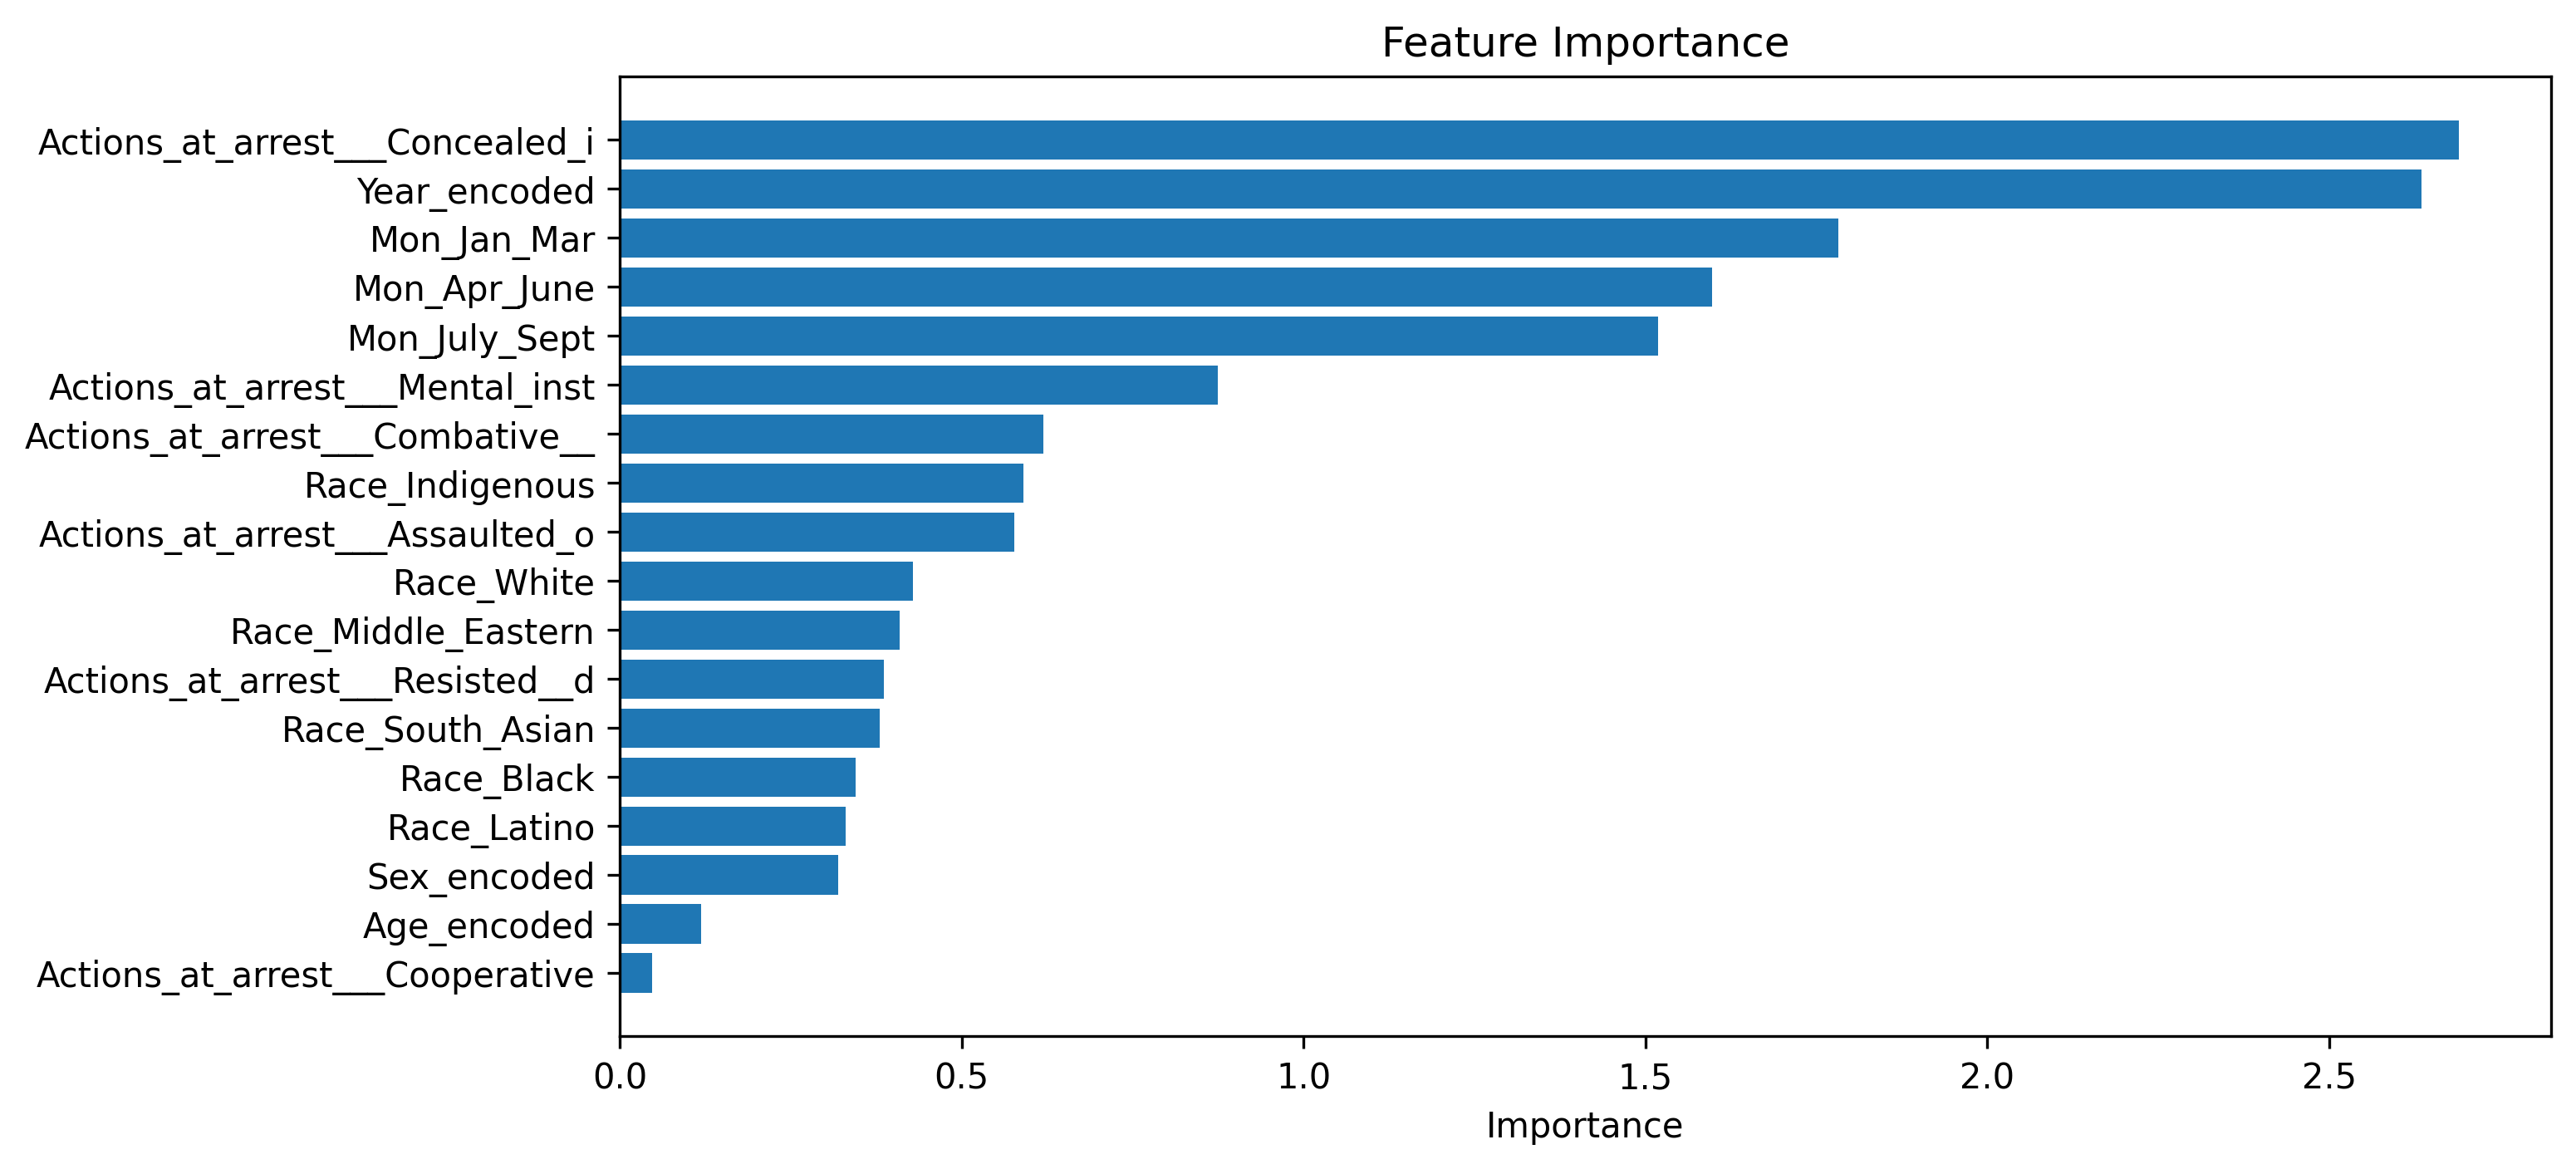

In [69]:
importance_scores_lg = abs(log_reg_2.params.values[1:])
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
sorted_indices = np.argsort(importance_scores_lg)
ax.barh(x_train.columns[sorted_indices], importance_scores_lg[sorted_indices], align='center')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()

In [70]:
# Remove age, sex and race
ImpPredictors = [ 'Actions_at_arrest___Concealed_i',
 'Actions_at_arrest___Combative__',
 'Actions_at_arrest___Resisted__d',
 'Actions_at_arrest___Mental_inst',
 'Actions_at_arrest___Assaulted_o',
# 'Actions_at_arrest___Cooperative',
# 'Sex_encoded',
 'Year_encoded',
# 'Age_encoded',
 'Mon_Apr_June',
 'Mon_Jan_Mar',
 'Mon_July_Sept',
# 'Mon_Oct_Dec', drop one category
# 'Race_Black',
# 'Race_East_Southeast_Asian', drop one category
# 'Race_Indigenous',
# 'Race_Latino',
# 'Race_Middle_Eastern',
# 'Race_South_Asian',
# 'Race_White'
 ]

In [71]:
from sklearn.model_selection import train_test_split
x = df3.loc[:,ImpPredictors]
y = df3.loc[:,"StripSearch"]

# Under-sampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x, y = rus.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [72]:
print(f'After Balancing, y statistics:\n{y.value_counts()}\n')

After Balancing, y statistics:
0    7264
1    7264
Name: StripSearch, dtype: int64



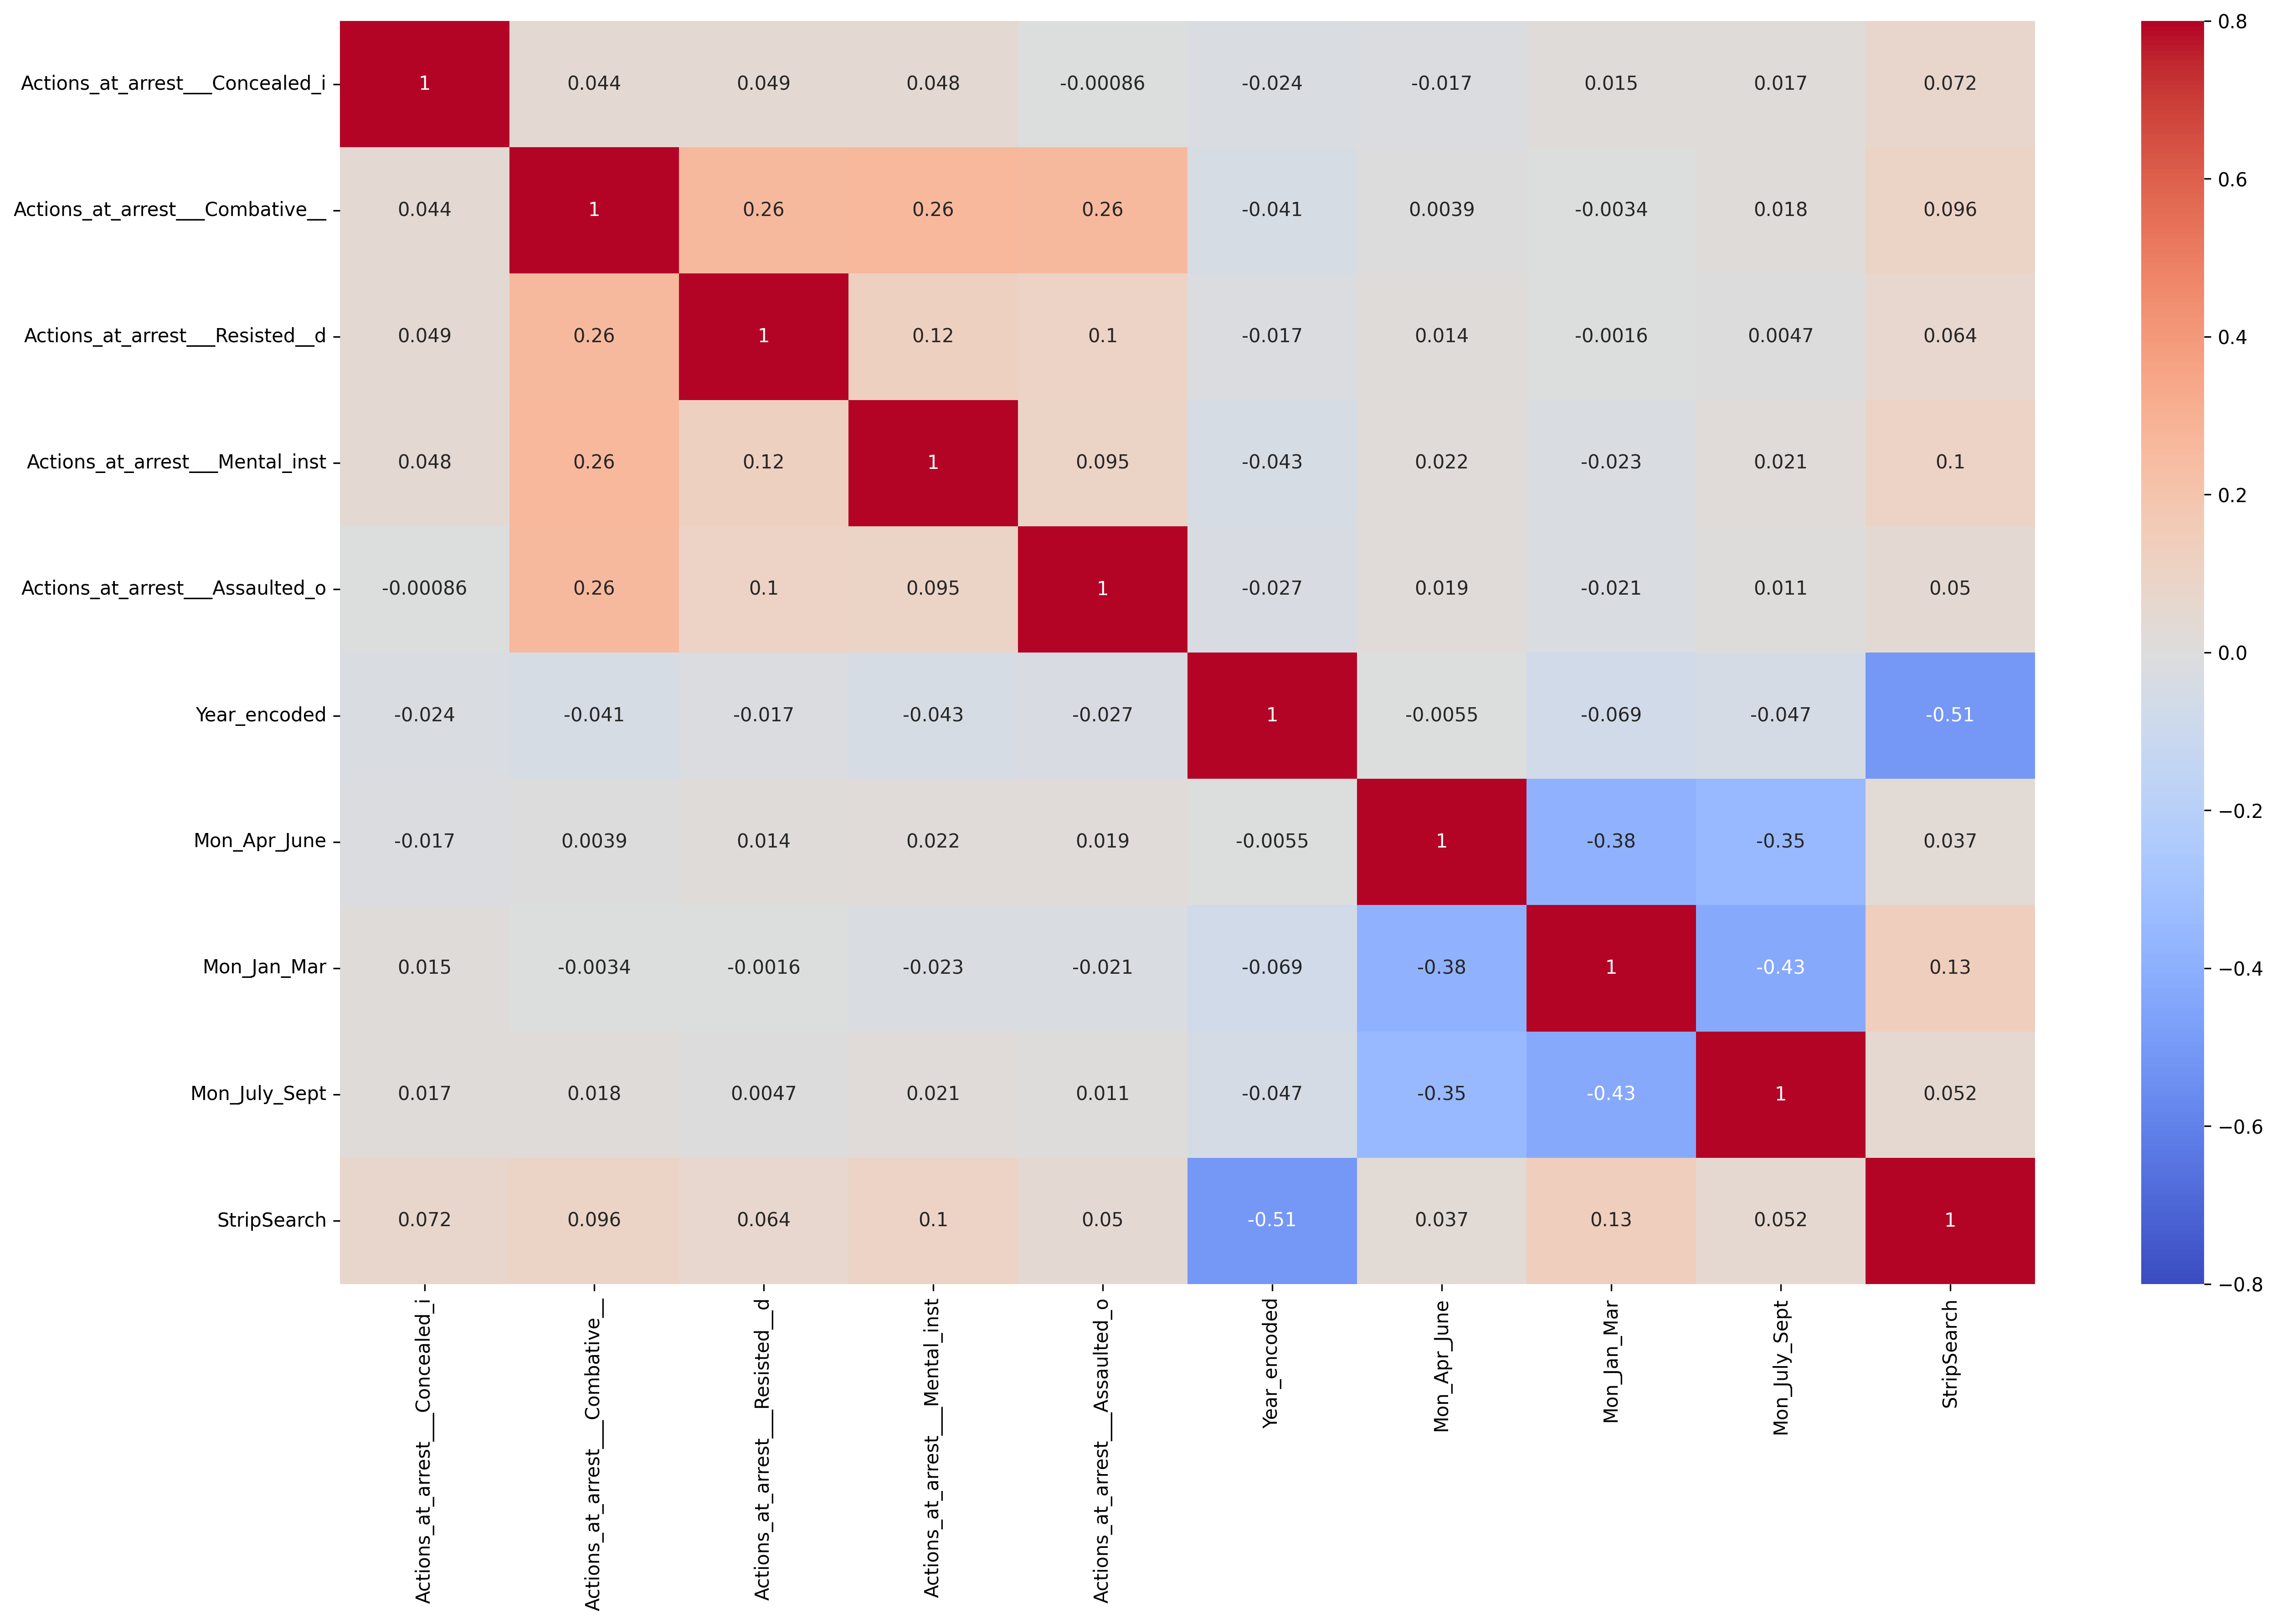

In [73]:
import seaborn as sns
df4 = pd.concat([x,y],axis=1)
corr = df4.corr()
fig, ax = plt.subplots(figsize=(20,12), dpi=300)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-.8, vmax=.8)
plt.show()

In [74]:
import statsmodels.formula.api as smf
all_columns = ' + '.join(ImpPredictors)
formula = "StripSearch ~ " + all_columns
print("Formula: ", formula, "\n")
trainingdata = pd.concat([x_train,y_train], axis = 1)
log_reg_3 = smf.logit(formula, data=trainingdata).fit()
log_reg_3.summary()

Formula:  StripSearch ~ Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__ + Actions_at_arrest___Resisted__d + Actions_at_arrest___Mental_inst + Actions_at_arrest___Assaulted_o + Year_encoded + Mon_Apr_June + Mon_Jan_Mar + Mon_July_Sept 

Optimization terminated successfully.
         Current function value: 0.510900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                10896
Model:                          Logit   Df Residuals:                    10886
Method:                           MLE   Df Model:                            9
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2629
Time:                        03:17:09   Log-Likelihood:                -5566.8
converged:                       True   LL-Null:                       -7552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.7982      0.067    -11.884      0.000      -0.930      -0.667
Actions_at_arrest___Concealed_i     2.8085      0.466      6.028      0.000       1.895       3.722
Actions_at_arrest___Combative__     0.6258      0.114      5.467      0.000       0.401       0.850
Actions_at_arrest___Resisted__d     0.4196      0.117      3.597      0.000       0.191       0.648
Actions_at_arrest___Mental_inst     0.8422      0.119      7.096      0.000       0.610       1.075
Actions_at_arrest___Assaulted_o     0.5086      0.284      1.794      0.073      -0.047       1.064
Year_encoded                       -2.6362      0.058    -45.530      0.000      -2.750      -2.523
Mon_Apr_June                        1.6032      0.082     19.669      0.000       1.443       1.763
Mon_Jan_Mar                         1.7967      0.078     23.025      0.000       1.644       1.950
Mon_July_Sept                       1.5173      0.079     19.272      0.000       1.363       1.672
===================================================================================================
"""

In [75]:
# Odds ratio and confidence intervals
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg_3.params,
        "Lower CI": log_reg_3.conf_int()[0],
        "Upper CI": log_reg_3.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

odds_ratios

OR  Lower CI   Upper CI
Intercept                         0.450120  0.394595   0.513458
Actions_at_arrest___Concealed_i  16.584981  6.654302  41.335905
Actions_at_arrest___Combative__   1.869752  1.494015   2.339985
Actions_at_arrest___Resisted__d   1.521303  1.210404   1.912059
Actions_at_arrest___Mental_inst   2.321533  1.839695   2.929570
Actions_at_arrest___Assaulted_o   1.662968  0.953984   2.898855
Year_encoded                      0.071633  0.063948   0.080241
Mon_Apr_June                      4.969021  4.235365   5.829763
Mon_Jan_Mar                       6.029743  5.174622   7.026175
Mon_July_Sept                     4.559787  3.907787   5.320571

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
# Predict responses 
pred_1 = log_reg_3.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
     
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))
print('\nArea under curve = ', roc_auc_score(y_test, prediction_1))


Test accuracy =  0.7808370044052864

Area under curve =  0.7786172230629484



Confusion Matrix : 
 [[1211  563]
 [ 233 1625]]


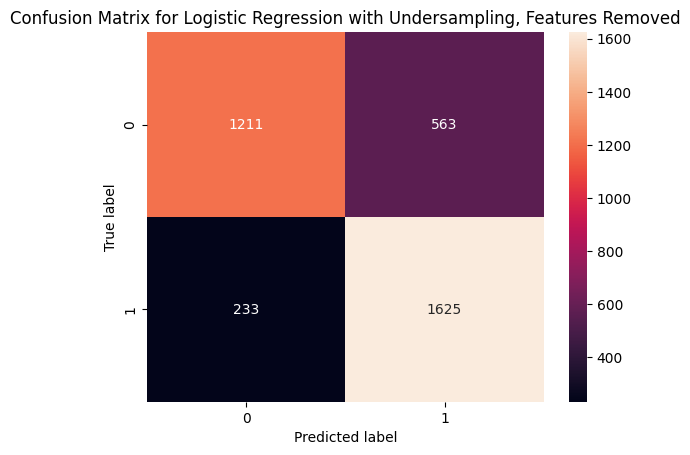

In [77]:
# Confusion matrix

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression with Undersampling, Features Removed')
plt.show()

In [78]:
# Remove age and cooperative actions
NonImpPredictors = [ #'Actions_at_arrest___Concealed_i',
# 'Actions_at_arrest___Combative__',
# 'Actions_at_arrest___Resisted__d',
# 'Actions_at_arrest___Mental_inst',
# 'Actions_at_arrest___Assaulted_o',
# 'Actions_at_arrest___Cooperative',
 'Sex_encoded',
# 'Year_encoded',
 'Age_encoded',
# 'Mon_Apr_June',
# 'Mon_Jan_Mar',
# 'Mon_July_Sept',
# 'Mon_Oct_Dec', drop one category
 'Race_Black',
# 'Race_East_Southeast_Asian', drop one category
 'Race_Indigenous',
 'Race_Latino',
 'Race_Middle_Eastern',
 'Race_South_Asian',
 'Race_White'
 ]

In [79]:
from sklearn.model_selection import train_test_split
x = df3.loc[:,NonImpPredictors]
y = df3.loc[:,"StripSearch"]

# Under-sampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x, y = rus.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [80]:
print(f'After Balancing, y statistics:\n{y.value_counts()}\n')

After Balancing, y statistics:
0    7264
1    7264
Name: StripSearch, dtype: int64



In [81]:
import statsmodels.formula.api as smf
all_columns = ' + '.join(NonImpPredictors)
formula = "StripSearch ~ " + all_columns
print("Formula: ", formula, "\n")
trainingdata = pd.concat([x_train,y_train], axis = 1)
log_reg_4 = smf.logit(formula, data=trainingdata).fit()
log_reg_4.summary()

Formula:  StripSearch ~ Sex_encoded + Age_encoded + Race_Black + Race_Indigenous + Race_Latino + Race_Middle_Eastern + Race_South_Asian + Race_White 

Optimization terminated successfully.
         Current function value: 0.680755
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                10896
Model:                          Logit   Df Residuals:                    10887
Method:                           MLE   Df Model:                            8
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.01784
Time:                        03:17:10   Log-Likelihood:                -7417.5
converged:                       True   LL-Null:                       -7552.2
Covariance Type:            nonrobust   LLR p-value:                 1.320e-53
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0623      0.089     -0.696      0.487      -0.238       0.113
Sex_encoded            -0.2995      0.051     -5.912      0.000      -0.399      -0.200
Age_encoded            -0.1283      0.016     -8.083      0.000      -0.159      -0.097
Race_Black              0.5202      0.087      5.992      0.000       0.350       0.690
Race_Indigenous         0.7776      0.129      6.039      0.000       0.525       1.030
Race_Latino            -0.1278      0.148     -0.866      0.387      -0.417       0.161
Race_Middle_Eastern    -0.2374      0.123     -1.932      0.053      -0.478       0.003
Race_South_Asian       -0.1877      0.121     -1.553      0.121      -0.425       0.049
Race_White              0.5403      0.084      6.413      0.000       0.375       0.705
=======================================================================================
"""

In [82]:
# Odds ratio and confidence intervals
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg_4.params,
        "Lower CI": log_reg_4.conf_int()[0],
        "Upper CI": log_reg_4.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

odds_ratios

OR  Lower CI  Upper CI
Intercept            0.939638  0.788457  1.119807
Sex_encoded          0.741216  0.671158  0.818586
Age_encoded          0.879547  0.852597  0.907350
Race_Black           1.682445  1.419180  1.994547
Race_Indigenous      2.176316  1.690856  2.801156
Race_Latino          0.880014  0.658939  1.175259
Race_Middle_Eastern  0.788671  0.619879  1.003425
Race_South_Asian     0.828856  0.653989  1.050480
Race_White           1.716590  1.455265  2.024842

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
# Predict responses 
pred_1 = log_reg_4.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
     
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))
print('\nArea under curve = ', roc_auc_score(y_test, prediction_1))


Test accuracy =  0.5685572687224669

Area under curve =  0.5673006093276522



Confusion Matrix : 
 [[ 910  864]
 [ 703 1155]]


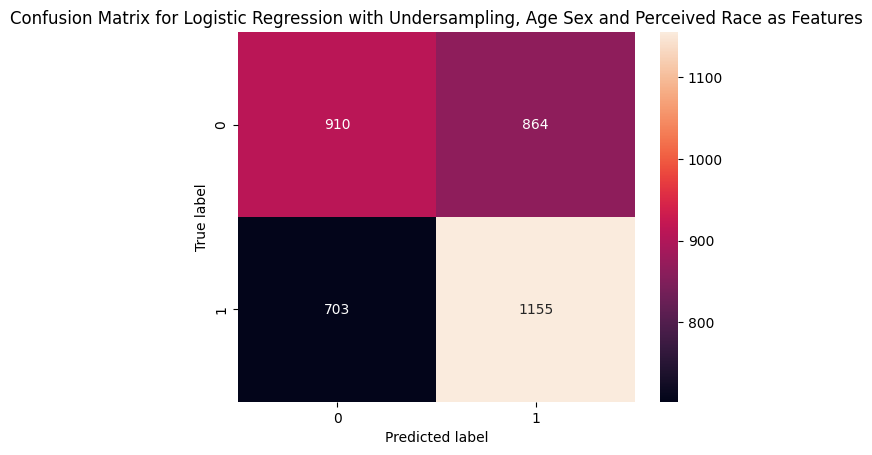

In [84]:
# Confusion matrix

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression with Undersampling, Age Sex and Perceived Race as Features')
plt.show()